<a href="https://colab.research.google.com/github/anjali20082/PerfEval/blob/master/CorrelationAnalysis_PythonNotebooks/Response_Time_Analysis/ISP_Specific.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/ResponseTime_wrt_time_net/jumbo_feature_ISP.csv')
df = pd.read_csv('/content/drive/MyDrive/SummerSem/ResponseTime_wrt_time_net/jumbo_feature_ISP.csv')
df

,FEATURE,STUDENT,ANDROID,DISTANCE,RAM,LATENCY,TIME_OF_DAY,NET_TYPE,ISP,PING_MEDIAN_GOOGLE,PING_MEDIAN_AMAZON,PING_MEDIAN_MOBIKWIK,PING_VARIANCE_GOOGLE,PING_VARIANCE_AMAZON,PING_VARIANCE_MOBIKWIK
0,Youtube_search channel page,vandana20106@iiitd.ac.in,11,0.000000,8,1008,1,0,Others,8.35,12.20,32.0,53.536932,310.423162,47.857387
1,Youtube_open channel page,vandana20106@iiitd.ac.in,11,0.000000,8,1836,1,0,Others,8.35,12.20,32.0,53.536932,310.423162,47.857387
2,Youtube_search video page,vandana20106@iiitd.ac.in,11,0.000000,8,1209,1,0,Others,8.35,14.50,31.5,60.708051,336.357735,63.212699
3,Youtube_play video page,vandana20106@iiitd.ac.in,11,0.000000,8,4080,1,0,Others,8.35,14.50,31.5,60.708051,336.357735,63.212699
4,LinkedIn_my profile page,vandana20106@iiitd.ac.in,11,0.000000,8,102,1,0,Others,7.43,16.70,30.2,98.971308,370.749097,98.904576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20857,Whatsapp_sending message,akhil20107@iiitd.ac.in,10,0.564232,6,1644,1,1,Jio,55.85,69.85,76.0,574.744244,192.536123,3758.935986
20858,GoogleMaps_searching place,akhil20107@iiitd.ac.in,10,0.564232,6,4386,1,1,Jio,56.15,69.80,74.5,573.754775,231.027901,7175.290809
20859,GoogleNews_opening news page,akhil20107@iiitd.ac.in,10,0.564232,6,2766,1,1,Jio,58.50,70.40,74.8,540.281067,275.775695,7499.583795
20860,Dailyhunt_opening news page,akhil20107@iiitd.ac.in,10,0.564232,6,1896,1,1,Jio,60.25,74.80,76.3,486.110176,296.824275,7479.584976


In [ ]:
df[['FEATURE', 'ISP', 'LATENCY']]

,FEATURE,ISP,LATENCY
0,Youtube_search channel page,Others,1008
1,Youtube_open channel page,Others,1836
2,Youtube_search video page,Others,1209
3,Youtube_play video page,Others,4080
4,LinkedIn_my profile page,Others,102
...,...,...,...
20857,Whatsapp_sending message,Jio,1644
20858,GoogleMaps_searching place,Jio,4386
20859,GoogleNews_opening news page,Jio,2766
20860,Dailyhunt_opening news page,Jio,1896


In [ ]:
# pd.set_option('max_rows', 394)
group = df.groupby(['FEATURE', 'ISP']).apply(lambda x: x['LATENCY'].unique())
print(group)

FEATURE                     ISP               
Amazon_add to cart clicked  Airtel                [2028, 1041, 1929, 1068, 1830, 22840, 2123, 10...
                            Alliance Broadband    [2027, 1218, 1257, 1334, 1949, 2568, 1262, 127...
                            BSNL Fibernet          [1989, 2795, 1025, 2366, 1632, 1039, 1875, 1620]
                            Bharti Airtel         [1051, 994, 1241, 61450, 1735, 1079, 3078, 110...
                            Jio                   [17905, 1237, 9475, 9278, 12654, 19232, 17049,...
                                                                        ...                        
Youtube_search video page   Jio Fiber             [1076, 1534, 1544, 976, 1387, 1026, 1023, 1249...
                            NKN Core Network      [1207, 1158, 1129, 1164, 1224, 1081, 1114, 151...
                            Others                [1209, 1292, 1176, 1210, 1217, 1232, 1242, 120...
                            Triple Play           [10

In [ ]:
df = group.apply(pd.Series)
df.reset_index(inplace=True)
# df[['APP', 'ACTION']] = df['FEATURE_NAME'].str.split('_', expand=True)
df[['FEATURE', 'ISP']]

,FEATURE,ISP
0,Amazon_add to cart clicked,Airtel
1,Amazon_add to cart clicked,Alliance Broadband
2,Amazon_add to cart clicked,BSNL Fibernet
3,Amazon_add to cart clicked,Bharti Airtel
4,Amazon_add to cart clicked,Jio
...,...,...
297,Youtube_search video page,Jio Fiber
298,Youtube_search video page,NKN Core Network
299,Youtube_search video page,Others
300,Youtube_search video page,Triple Play


In [ ]:
print((df['FEATURE'].unique()))

['Amazon_add to cart clicked' 'Amazon_go to cart clicked'
 'Amazon_product profile page' 'Amazon_remove from cart clicked'
 'Amazon_search results page' 'Dailyhunt_opening news page'
 'Facebook_person profile page' 'Facebook_post in a group'
 'Facebook_search results page' 'Flipkart_add to cart clicked'
 'Flipkart_go to cart clicked' 'Flipkart_product profile page'
 'Flipkart_remove from cart clicked' 'Flipkart_search results page'
 'GoogleMaps_searching place' 'GoogleNews_opening news page'
 'Hotstar_open trending page' 'Hotstar_play video page'
 'Hotstar_search video page' 'LinkedIn_my connections page'
 'LinkedIn_my profile page' 'LinkedIn_person profile page'
 'LinkedIn_search results page' 'Paytm_person profile page'
 'Paytm_transaction from wallet' 'Telegram_sending message'
 'Whatsapp_sending message' 'Youtube_open channel page'
 'Youtube_play video page' 'Youtube_search channel page'
 'Youtube_search video page']


In [ ]:
plt.rcParams.update({'figure.autolayout': True})
mlt.rcParams['figure.figsize'] = 14, 10
boxprops = dict(linewidth=4)
medianprops = dict(linewidth=4)

SMALL_SIZE = 30
MEDIUM_SIZE = 30
BIGGER_SIZE = 30

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [ ]:
df = df.fillna(0)
filtered_data = [0] * len(df)
xlabels = [0] * len(df)
print(df)
for rownum in range(len(df)):
    values = df.iloc[rownum, 2:].values
    values = values[values != 0]
    # print(values)
    print("Median Value: ", np.median(values))
    filtered_data[rownum] = values
    # xlabels[rownum] = df.iloc[rownum, -1]
    # xlabels[rownum]
print(filtered_data)

                        FEATURE                 ISP        0  ...  217  218  219
0    Amazon_add to cart clicked              Airtel   2028.0  ...  0.0  0.0  0.0
1    Amazon_add to cart clicked  Alliance Broadband   2027.0  ...  0.0  0.0  0.0
2    Amazon_add to cart clicked       BSNL Fibernet   1989.0  ...  0.0  0.0  0.0
3    Amazon_add to cart clicked       Bharti Airtel   1051.0  ...  0.0  0.0  0.0
4    Amazon_add to cart clicked                 Jio  17905.0  ...  0.0  0.0  0.0
..                          ...                 ...      ...  ...  ...  ...  ...
297   Youtube_search video page           Jio Fiber   1076.0  ...  0.0  0.0  0.0
298   Youtube_search video page    NKN Core Network   1207.0  ...  0.0  0.0  0.0
299   Youtube_search video page              Others   1209.0  ...  0.0  0.0  0.0
300   Youtube_search video page         Triple Play   1072.0  ...  0.0  0.0  0.0
301   Youtube_search video page            Vodafone   1139.0  ...  0.0  0.0  0.0

[302 rows x 222 columns]
Me

[0 1 2 3 4 5 6 7 8 9]
Median Value:  1929.0
Median Value:  2022.0
Median Value:  1753.5
Median Value:  1741.5
Median Value:  2065.0
Median Value:  2133.0
Median Value:  1661.0
Median Value:  1983.5
Median Value:  3118.0
Median Value:  2581.5


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


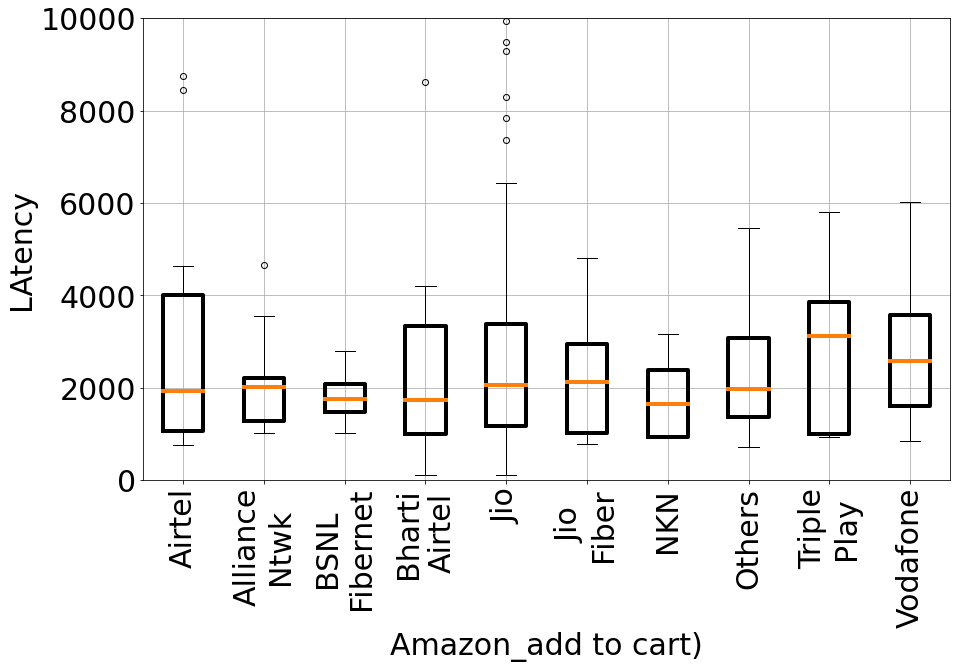

In [ ]:
rowvalues = df[df['FEATURE'] == 'Amazon_add to cart clicked'].index.values
print(rowvalues)
filtered_data = [0] * 10
xlabels = [0] * 10
count = 0
for rownum in rowvalues:
    values = df.iloc[rownum, 2:].values
    values = values[values != 0]
    print("Median Value: ", np.median(values))
    filtered_data[count] = values
    xlabels[count] = df.iloc[rownum, -1]
    count += 1
xlabels=['Airtel', 'Alliance\nNtwk', 'BSNL\nFibernet', 'Bharti\nAirtel', 'Jio','Jio\nFiber','NKN','Others','Triple\nPlay','Vodafone']
plt.grid()
plt.boxplot(filtered_data, labels=xlabels, boxprops=boxprops, medianprops=medianprops)
plt.xticks(rotation=90)
plt.xlabel('Amazon_add to cart)')
plt.ylabel('LAtency')
plt.ylim([0, 10000])

#plt.show()
plt.savefig('/content/drive/MyDrive/SummerSem/ResponseTime_wrt_time_net/ISP_Plots/'+'Amazon_add to cart clicked.pdf', bbox_inches='tight')


[10 11 12 13 14 15 16 17 18 19]
Median Value:  2618.0
Median Value:  2598.5
Median Value:  2200.5
Median Value:  2300.0
Median Value:  2250.0
Median Value:  2446.5
Median Value:  3053.5
Median Value:  2103.0
Median Value:  2245.0
Median Value:  2563.0


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


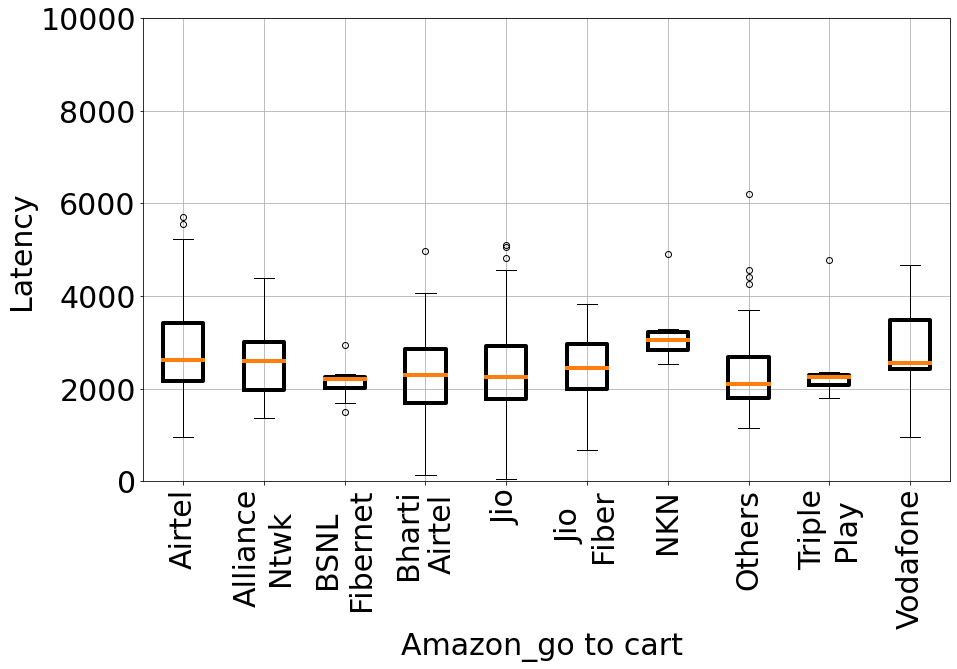

In [ ]:
rowvalues = df[df['FEATURE'] == 'Amazon_go to cart clicked'].index.values
print(rowvalues)
filtered_data = [0] * 10
xlabels = [0] * 10
count = 0
for rownum in rowvalues:
    values = df.iloc[rownum, 2:].values
    values = values[values != 0]
    print("Median Value: ", np.median(values))
    filtered_data[count] = values
    xlabels[count] = df.iloc[rownum, -1]
    count += 1
xlabels=['Airtel', 'Alliance\nNtwk', 'BSNL\nFibernet', 'Bharti\nAirtel', 'Jio','Jio\nFiber','NKN','Others','Triple\nPlay','Vodafone']
plt.grid()
plt.boxplot(filtered_data, labels=xlabels, boxprops=boxprops, medianprops=medianprops)
plt.xticks(rotation=90)
plt.xlabel('Amazon_go to cart ')
plt.ylabel('Latency')
plt.ylim([0, 10000])

#plt.show()
plt.savefig('/content/drive/MyDrive/SummerSem/ResponseTime_wrt_time_net/ISP_Plots/'+'Amazon_go to cart clicked.pdf', bbox_inches='tight')


[20 21 22 23 24 25 26 27 28 29]
Median Value:  2909.0
Median Value:  3151.0
Median Value:  3293.0
Median Value:  2308.0
Median Value:  2563.5
Median Value:  2022.0
Median Value:  1854.5
Median Value:  2432.0
Median Value:  3751.5
Median Value:  2537.0


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


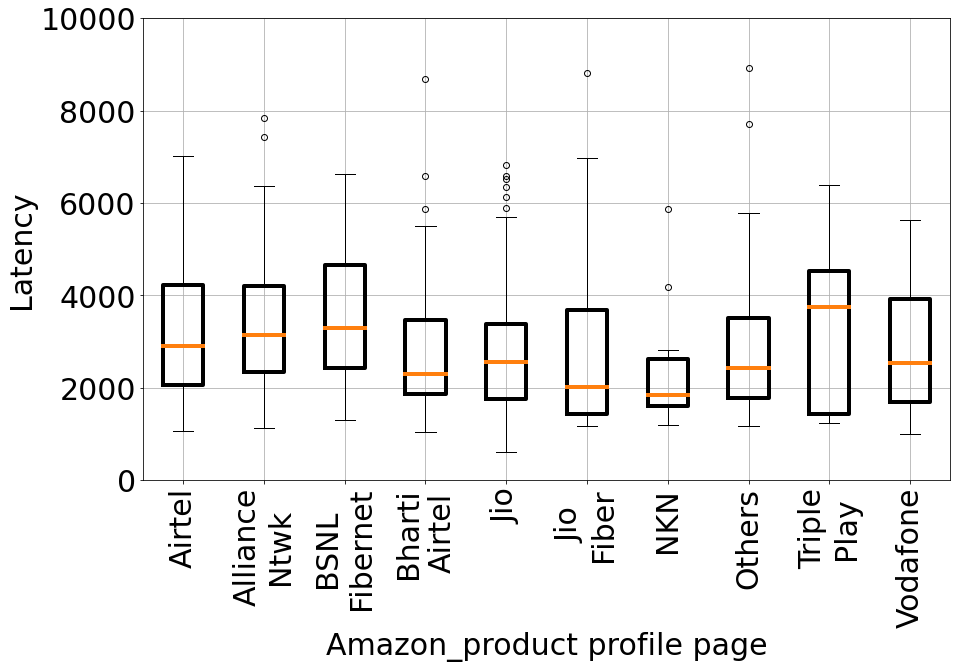

In [ ]:
rowvalues = df[df['FEATURE'] == 'Amazon_product profile page'].index.values
print(rowvalues)
filtered_data = [0] * 10
xlabels = [0] * 10
count = 0
for rownum in rowvalues:
    values = df.iloc[rownum, 2:].values
    values = values[values != 0]
    print("Median Value: ", np.median(values))
    filtered_data[count] = values
    xlabels[count] = df.iloc[rownum, -1]
    count += 1
xlabels=['Airtel', 'Alliance\nNtwk', 'BSNL\nFibernet', 'Bharti\nAirtel', 'Jio','Jio\nFiber','NKN','Others','Triple\nPlay','Vodafone']
plt.grid()
plt.boxplot(filtered_data, labels=xlabels, boxprops=boxprops, medianprops=medianprops)
plt.xticks(rotation=90)
plt.xlabel('Amazon_product profile page')
plt.ylabel('Latency')
plt.ylim([0, 10000])

#plt.show()
plt.savefig('/content/drive/MyDrive/SummerSem/ResponseTime_wrt_time_net/ISP_Plots/'+'Amazon_product profile page.pdf', bbox_inches='tight')


[30 31 32 33 34 35 36 37 38 39]
Median Value:  1108.0
Median Value:  1078.0
Median Value:  1552.5
Median Value:  1050.0
Median Value:  1101.0
Median Value:  1097.0
Median Value:  878.5
Median Value:  1399.0
Median Value:  938.5
Median Value:  1021.0


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


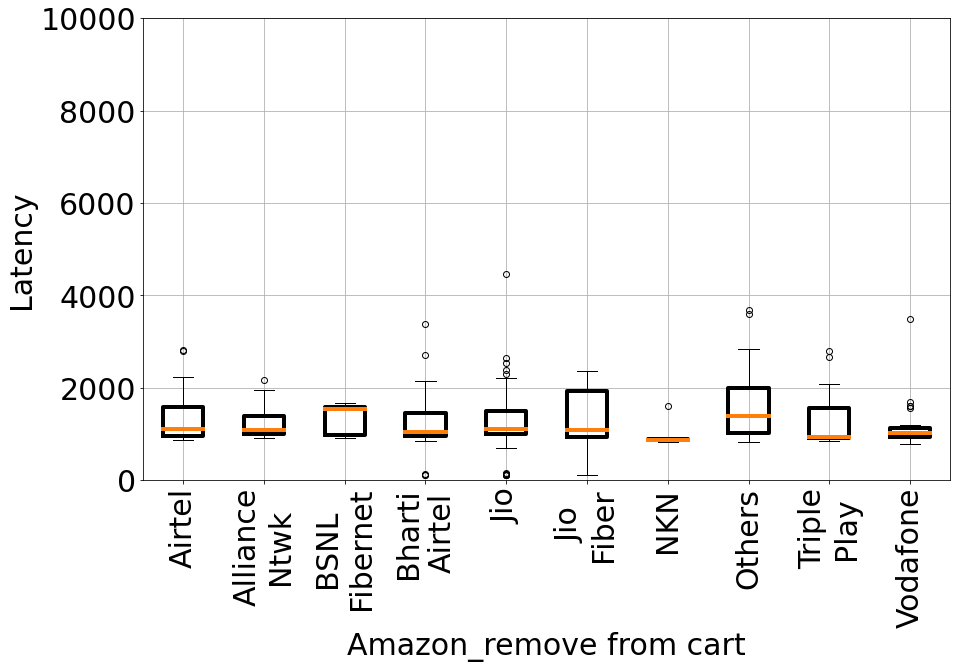

In [ ]:
rowvalues = df[df['FEATURE'] == 'Amazon_remove from cart clicked'].index.values
print(rowvalues)
filtered_data = [0] * 10
xlabels = [0] * 10
count = 0
for rownum in rowvalues:
    values = df.iloc[rownum, 2:].values
    values = values[values != 0]
    print("Median Value: ", np.median(values))
    filtered_data[count] = values
    xlabels[count] = df.iloc[rownum, -1]
    count += 1
xlabels=['Airtel', 'Alliance\nNtwk', 'BSNL\nFibernet', 'Bharti\nAirtel', 'Jio','Jio\nFiber','NKN','Others','Triple\nPlay','Vodafone']
plt.grid()
plt.boxplot(filtered_data, labels=xlabels, boxprops=boxprops, medianprops=medianprops)
plt.xticks(rotation=90)
plt.xlabel('Amazon_remove from cart')
plt.ylabel('Latency')
plt.ylim([0, 10000])

#plt.show()
plt.savefig('/content/drive/MyDrive/SummerSem/ResponseTime_wrt_time_net/ISP_Plots/'+'Amazon_remove from cart clicked.pdf', bbox_inches='tight')


[40 41 42 43 44 45 46 47 48 49]
Median Value:  1559.0
Median Value:  1331.0
Median Value:  1782.0
Median Value:  1362.0
Median Value:  1482.0
Median Value:  1606.0
Median Value:  1118.0
Median Value:  1469.0
Median Value:  3217.0
Median Value:  1509.0


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


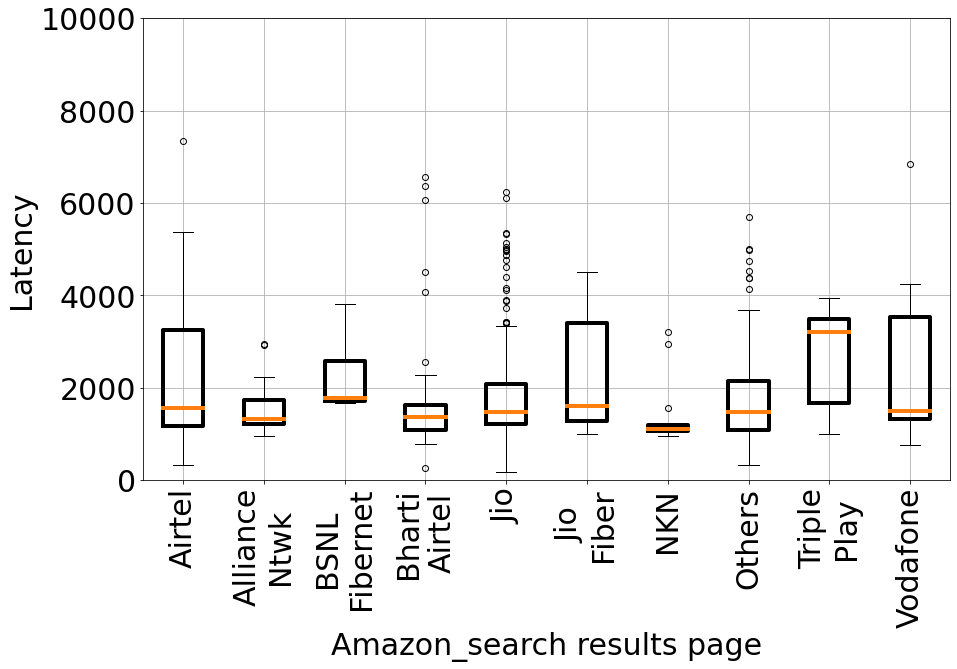

In [ ]:
rowvalues = df[df['FEATURE'] == 'Amazon_search results page'].index.values
print(rowvalues)
filtered_data = [0] * 10
xlabels = [0] * 10
count = 0
for rownum in rowvalues:
    values = df.iloc[rownum, 2:].values
    values = values[values != 0]
    print("Median Value: ", np.median(values))
    filtered_data[count] = values
    xlabels[count] = df.iloc[rownum, -1]
    count += 1
xlabels=['Airtel', 'Alliance\nNtwk', 'BSNL\nFibernet', 'Bharti\nAirtel', 'Jio','Jio\nFiber','NKN','Others','Triple\nPlay','Vodafone']
plt.grid()
plt.boxplot(filtered_data, labels=xlabels, boxprops=boxprops, medianprops=medianprops)
plt.xticks(rotation=90)
plt.xlabel('Amazon_search results page')
plt.ylabel('Latency')
plt.ylim([0, 10000])

#plt.show()
plt.savefig('/content/drive/MyDrive/SummerSem/ResponseTime_wrt_time_net/ISP_Plots/'+'Amazon_search results page.pdf', bbox_inches='tight')


[50 51 52 53 54 55 56 57 58]
Median Value:  2272.0
Median Value:  2189.0
Median Value:  2330.0
Median Value:  2205.5
Median Value:  2024.0
Median Value:  2157.5
Median Value:  2069.5
Median Value:  1966.5
Median Value:  2101.0


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


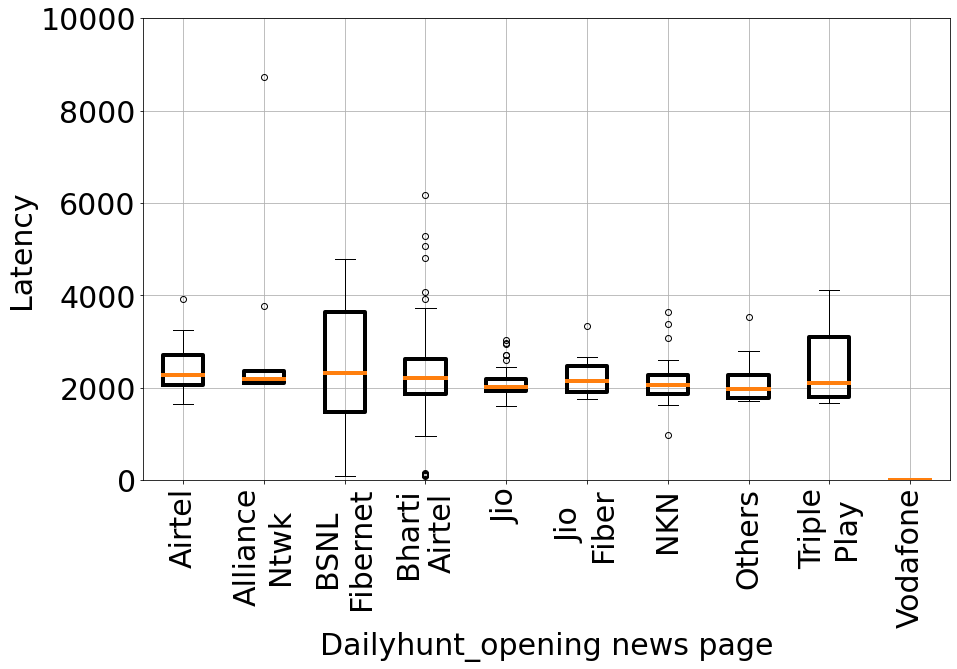

In [ ]:
rowvalues = df[df['FEATURE'] == 'Dailyhunt_opening news page'].index.values
print(rowvalues)
filtered_data = [0] * 10
xlabels = [0] * 10
count = 0
for rownum in rowvalues:
    values = df.iloc[rownum, 2:].values
    values = values[values != 0]
    print("Median Value: ", np.median(values))
    filtered_data[count] = values
    xlabels[count] = df.iloc[rownum, -1]
    count += 1
xlabels=['Airtel', 'Alliance\nNtwk', 'BSNL\nFibernet', 'Bharti\nAirtel', 'Jio','Jio\nFiber','NKN','Others','Triple\nPlay','Vodafone']
plt.grid()
plt.boxplot(filtered_data, labels=xlabels, boxprops=boxprops, medianprops=medianprops)
plt.xticks(rotation=90)
plt.xlabel('Dailyhunt_opening news page')
plt.ylabel('Latency')
plt.ylim([0, 10000])

#plt.show()
plt.savefig('/content/drive/MyDrive/SummerSem/ResponseTime_wrt_time_net/ISP_Plots/'+'Dailyhunt_opening news page.pdf', bbox_inches='tight')


[59 60 61 62 63 64 65 66 67 68]
Median Value:  1294.0
Median Value:  1640.5
Median Value:  855.0
Median Value:  1664.5
Median Value:  1280.0
Median Value:  1417.0
Median Value:  1012.0
Median Value:  876.5
Median Value:  852.0
Median Value:  1071.5


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


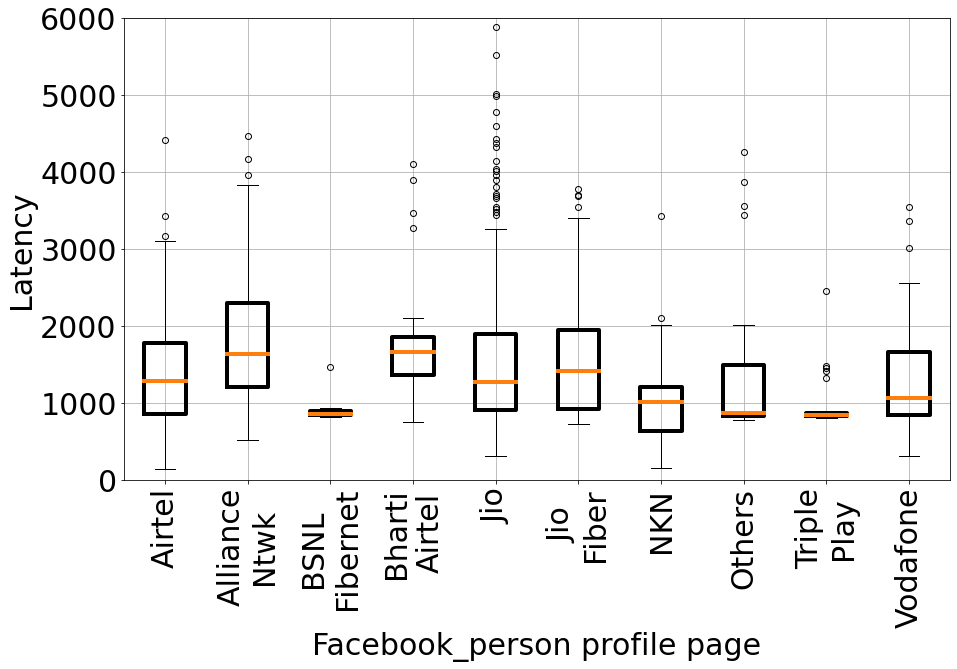

In [ ]:
rowvalues = df[df['FEATURE'] == 'Facebook_person profile page'].index.values
print(rowvalues)
filtered_data = [0] * 10
xlabels = [0] * 10
count = 0
for rownum in rowvalues:
    values = df.iloc[rownum, 2:].values
    values = values[values != 0]
    print("Median Value: ", np.median(values))
    filtered_data[count] = values
    xlabels[count] = df.iloc[rownum, -1]
    count += 1
xlabels=['Airtel', 'Alliance\nNtwk', 'BSNL\nFibernet', 'Bharti\nAirtel', 'Jio','Jio\nFiber','NKN','Others','Triple\nPlay','Vodafone']
plt.grid()
plt.boxplot(filtered_data, labels=xlabels, boxprops=boxprops, medianprops=medianprops)
plt.xticks(rotation=90)
plt.xlabel('Facebook_person profile page')
plt.ylabel('Latency')
plt.ylim([0, 6000])

#plt.show()
plt.savefig('/content/drive/MyDrive/SummerSem/ResponseTime_wrt_time_net/ISP_Plots/'+'Facebook_person profile page.pdf', bbox_inches='tight')


[69 70 71 72 73 74 75 76 77 78]
Median Value:  1528.0
Median Value:  1715.0
Median Value:  1280.0
Median Value:  1895.0
Median Value:  1705.0
Median Value:  1416.0
Median Value:  3107.0
Median Value:  1556.0
Median Value:  1739.0
Median Value:  1388.0


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


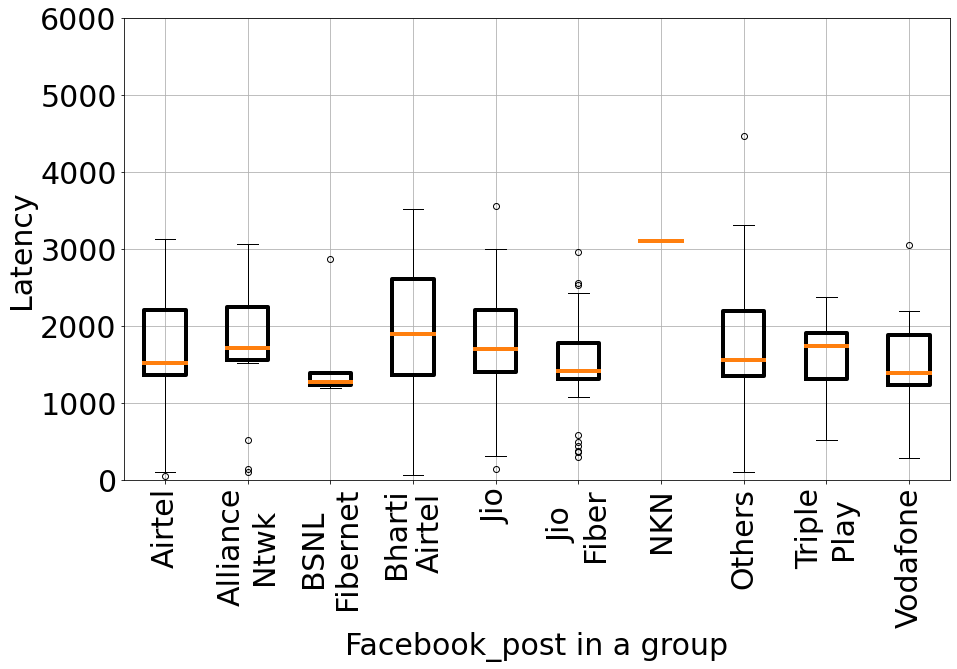

In [ ]:
rowvalues = df[df['FEATURE'] == 'Facebook_post in a group'].index.values
print(rowvalues)
filtered_data = [0] * 10
xlabels = [0] * 10
count = 0
for rownum in rowvalues:
    values = df.iloc[rownum, 2:].values
    values = values[values != 0]
    print("Median Value: ", np.median(values))
    filtered_data[count] = values
    xlabels[count] = df.iloc[rownum, -1]
    count += 1
xlabels=['Airtel', 'Alliance\nNtwk', 'BSNL\nFibernet', 'Bharti\nAirtel', 'Jio','Jio\nFiber','NKN','Others','Triple\nPlay','Vodafone']
plt.grid()
plt.boxplot(filtered_data, labels=xlabels, boxprops=boxprops, medianprops=medianprops)
plt.xticks(rotation=90)
plt.xlabel('Facebook_post in a group')
plt.ylabel('Latency')
plt.ylim([0, 6000])

#plt.show()
plt.savefig('/content/drive/MyDrive/SummerSem/ResponseTime_wrt_time_net/ISP_Plots/'+'Facebook_post in a group.pdf', bbox_inches='tight')


[79 80 81 82 83 84 85 86 87 88]
Median Value:  3057.5
Median Value:  3142.0
Median Value:  2346.0
Median Value:  2860.0
Median Value:  2714.0
Median Value:  2662.5
Median Value:  2763.0
Median Value:  2750.0
Median Value:  2652.0
Median Value:  2935.5


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


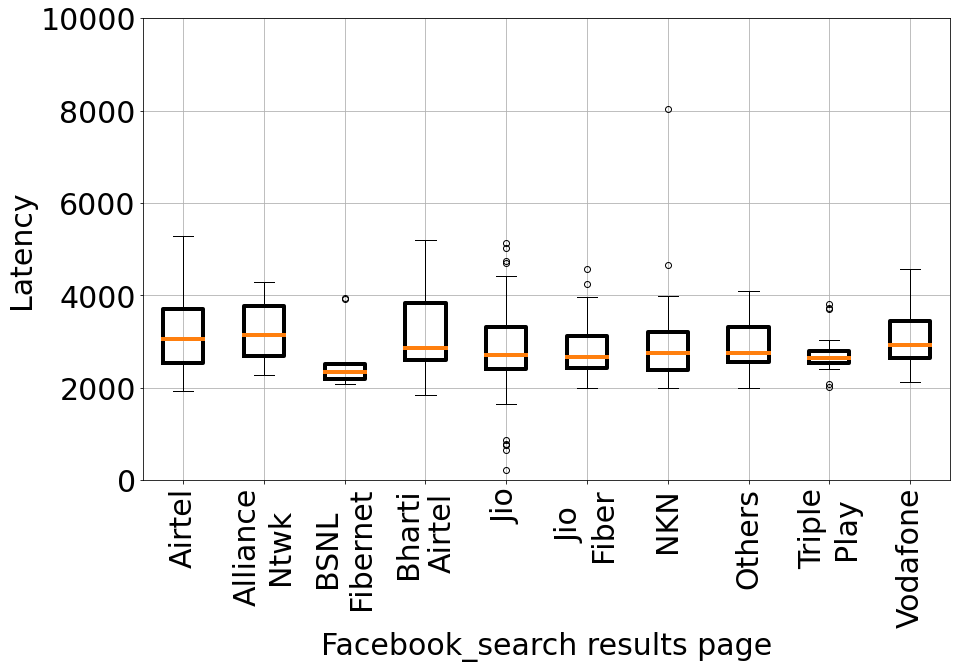

In [ ]:
rowvalues = df[df['FEATURE'] == 'Facebook_search results page'].index.values
print(rowvalues)
filtered_data = [0] * 10
xlabels = [0] * 10
count = 0
for rownum in rowvalues:
    values = df.iloc[rownum, 2:].values
    values = values[values != 0]
    print("Median Value: ", np.median(values))
    filtered_data[count] = values
    xlabels[count] = df.iloc[rownum, -1]
    count += 1
xlabels=['Airtel', 'Alliance\nNtwk', 'BSNL\nFibernet', 'Bharti\nAirtel', 'Jio','Jio\nFiber','NKN','Others','Triple\nPlay','Vodafone']
plt.grid()
plt.boxplot(filtered_data, labels=xlabels, boxprops=boxprops, medianprops=medianprops)
plt.xticks(rotation=90)
plt.xlabel('Facebook_search results page')
plt.ylabel('Latency')
plt.ylim([0, 10000])

#plt.show()
plt.savefig('/content/drive/MyDrive/SummerSem/ResponseTime_wrt_time_net/ISP_Plots/'+'Facebook_search results page.pdf', bbox_inches='tight')


[89 90 91 92 93 94 95 96 97 98]
Median Value:  1728.0
Median Value:  994.0
Median Value:  2022.5
Median Value:  1070.5
Median Value:  1092.0
Median Value:  1800.0
Median Value:  1759.0
Median Value:  1974.0
Median Value:  922.0
Median Value:  1256.0


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


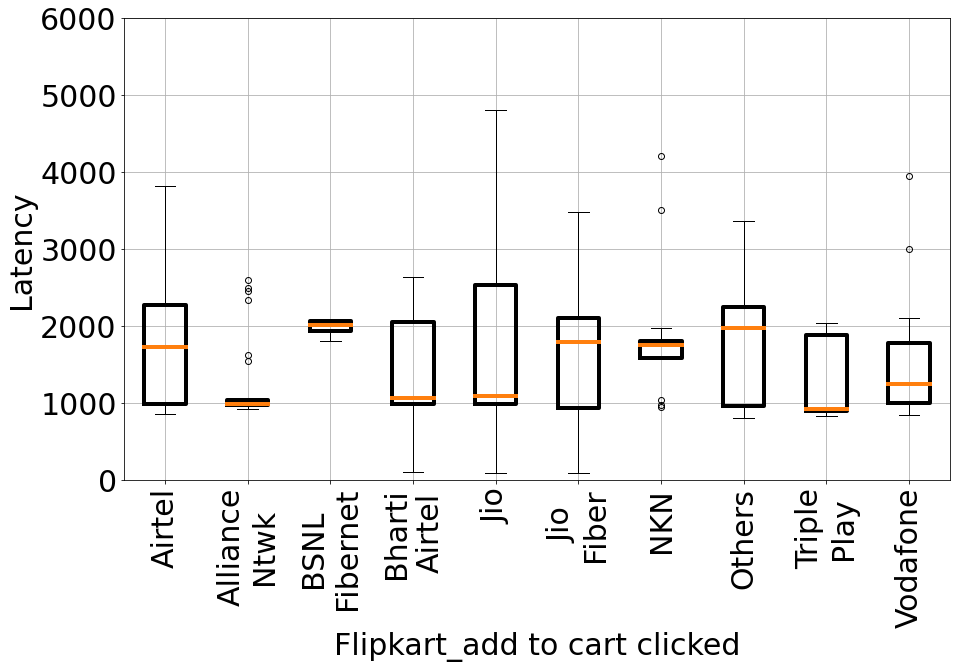

In [ ]:
rowvalues = df[df['FEATURE'] == 'Flipkart_add to cart clicked'].index.values
print(rowvalues)
filtered_data = [0] * 10
xlabels = [0] * 10
count = 0
for rownum in rowvalues:
    values = df.iloc[rownum, 2:].values
    values = values[values != 0]
    print("Median Value: ", np.median(values))
    filtered_data[count] = values
    xlabels[count] = df.iloc[rownum, -1]
    count += 1
xlabels=['Airtel', 'Alliance\nNtwk', 'BSNL\nFibernet', 'Bharti\nAirtel', 'Jio','Jio\nFiber','NKN','Others','Triple\nPlay','Vodafone']
plt.grid()
plt.boxplot(filtered_data, labels=xlabels, boxprops=boxprops, medianprops=medianprops)
plt.xticks(rotation=90)
plt.xlabel('Flipkart_add to cart clicked')
plt.ylabel('Latency')
plt.ylim([0, 6000])

#plt.show()
plt.savefig('/content/drive/MyDrive/SummerSem/ResponseTime_wrt_time_net/ISP_Plots/'+'Flipkart_add to cart clicked.pdf', bbox_inches='tight')


[ 99 100 101 102 103 104 105 106 107 108]
Median Value:  1579.0
Median Value:  2003.5
Median Value:  1908.0
Median Value:  1573.0
Median Value:  1997.5
Median Value:  1872.0
Median Value:  2023.0
Median Value:  1546.5
Median Value:  1544.0
Median Value:  1950.0


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


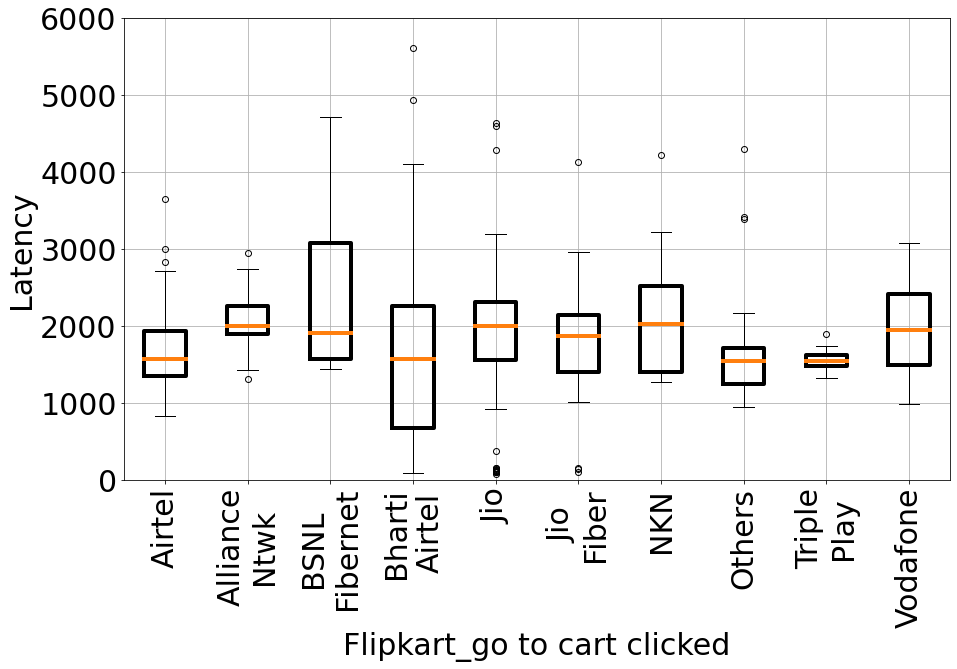

In [ ]:
rowvalues = df[df['FEATURE'] == 'Flipkart_go to cart clicked'].index.values
print(rowvalues)
filtered_data = [0] * 10
xlabels = [0] * 10
count = 0
for rownum in rowvalues:
    values = df.iloc[rownum, 2:].values
    values = values[values != 0]
    print("Median Value: ", np.median(values))
    filtered_data[count] = values
    xlabels[count] = df.iloc[rownum, -1]
    count += 1
xlabels=['Airtel', 'Alliance\nNtwk', 'BSNL\nFibernet', 'Bharti\nAirtel', 'Jio','Jio\nFiber','NKN','Others','Triple\nPlay','Vodafone']
plt.grid()
plt.boxplot(filtered_data, labels=xlabels, boxprops=boxprops, medianprops=medianprops)
plt.xticks(rotation=90)
plt.xlabel('Flipkart_go to cart clicked')
plt.ylabel('Latency')
plt.ylim([0, 6000])

#plt.show()
plt.savefig('/content/drive/MyDrive/SummerSem/ResponseTime_wrt_time_net/ISP_Plots/'+'Flipkart_go to cart clicked.pdf', bbox_inches='tight')


[109 110 111 112 113 114 115 116 117 118]
Median Value:  2549.5
Median Value:  3481.0
Median Value:  1975.0
Median Value:  1538.0
Median Value:  2907.0
Median Value:  2492.5
Median Value:  3099.0
Median Value:  2707.5
Median Value:  2196.0
Median Value:  2684.0


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


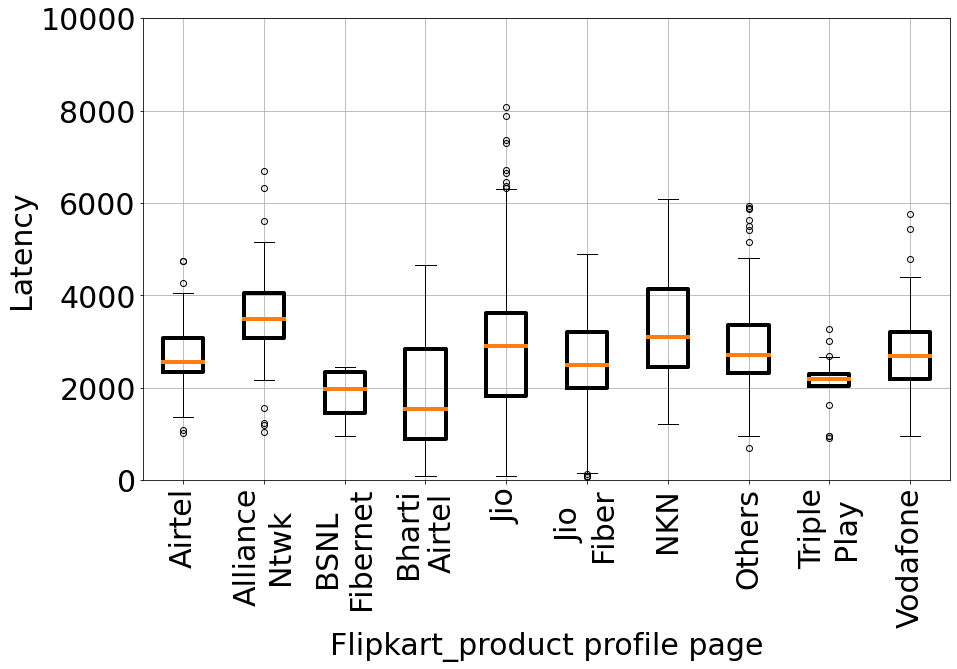

In [ ]:
rowvalues = df[df['FEATURE'] == 'Flipkart_product profile page'].index.values
print(rowvalues)
filtered_data = [0] * 10
xlabels = [0] * 10
count = 0
for rownum in rowvalues:
    values = df.iloc[rownum, 2:].values
    values = values[values != 0]
    print("Median Value: ", np.median(values))
    filtered_data[count] = values
    xlabels[count] = df.iloc[rownum, -1]
    count += 1
xlabels=['Airtel', 'Alliance\nNtwk', 'BSNL\nFibernet', 'Bharti\nAirtel', 'Jio','Jio\nFiber','NKN','Others','Triple\nPlay','Vodafone']
plt.grid()
plt.boxplot(filtered_data, labels=xlabels, boxprops=boxprops, medianprops=medianprops)
plt.xticks(rotation=90)
plt.xlabel('Flipkart_product profile page')
plt.ylabel('Latency')
plt.ylim([0, 10000])

#plt.show()
plt.savefig('/content/drive/MyDrive/SummerSem/ResponseTime_wrt_time_net/ISP_Plots/'+'Flipkart_product profile page.pdf', bbox_inches='tight')


[119 120 121 122 123 124 125 126 127 128]
Median Value:  186.0
Median Value:  194.0
Median Value:  146.5
Median Value:  151.0
Median Value:  177.5
Median Value:  188.0
Median Value:  115.0
Median Value:  157.5
Median Value:  167.0
Median Value:  160.5


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


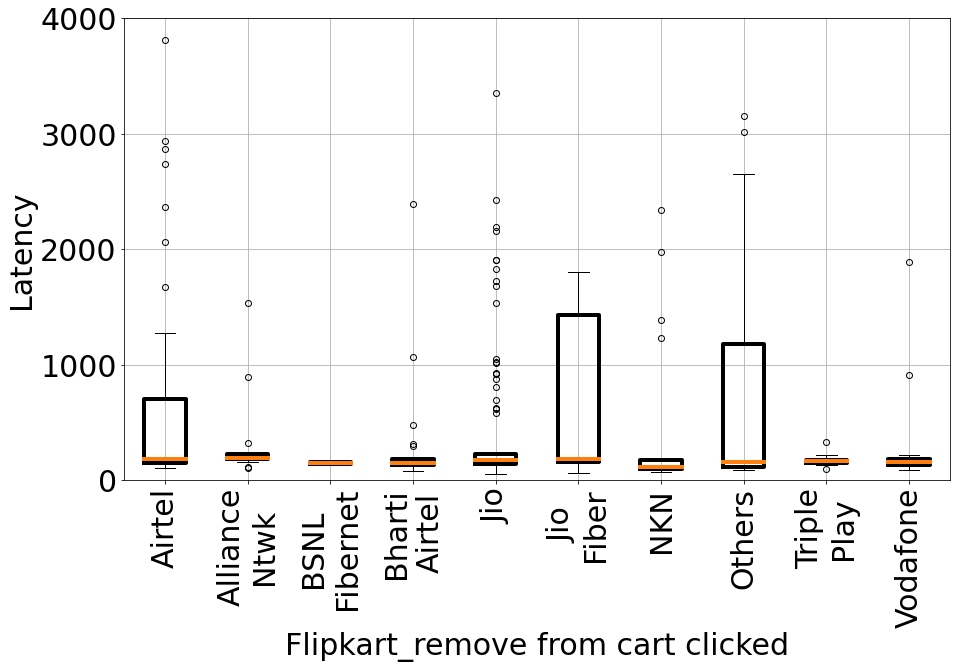

In [ ]:
rowvalues = df[df['FEATURE'] == 'Flipkart_remove from cart clicked'].index.values
print(rowvalues)
filtered_data = [0] * 10
xlabels = [0] * 10
count = 0
for rownum in rowvalues:
    values = df.iloc[rownum, 2:].values
    values = values[values != 0]
    print("Median Value: ", np.median(values))
    filtered_data[count] = values
    xlabels[count] = df.iloc[rownum, -1]
    count += 1
xlabels=['Airtel', 'Alliance\nNtwk', 'BSNL\nFibernet', 'Bharti\nAirtel', 'Jio','Jio\nFiber','NKN','Others','Triple\nPlay','Vodafone']
plt.grid()
plt.boxplot(filtered_data, labels=xlabels, boxprops=boxprops, medianprops=medianprops)
plt.xticks(rotation=90)
plt.xlabel('Flipkart_remove from cart clicked')
plt.ylabel('Latency')
plt.ylim([0, 4000])

#plt.show()
plt.savefig('/content/drive/MyDrive/SummerSem/ResponseTime_wrt_time_net/ISP_Plots/'+'Flipkart_remove from cart clicked.pdf', bbox_inches='tight')


[129 130 131 132 133 134 135 136 137 138]
Median Value:  193.0
Median Value:  221.0
Median Value:  167.0
Median Value:  189.5
Median Value:  213.0
Median Value:  197.0
Median Value:  123.0
Median Value:  158.0
Median Value:  174.0
Median Value:  176.0


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


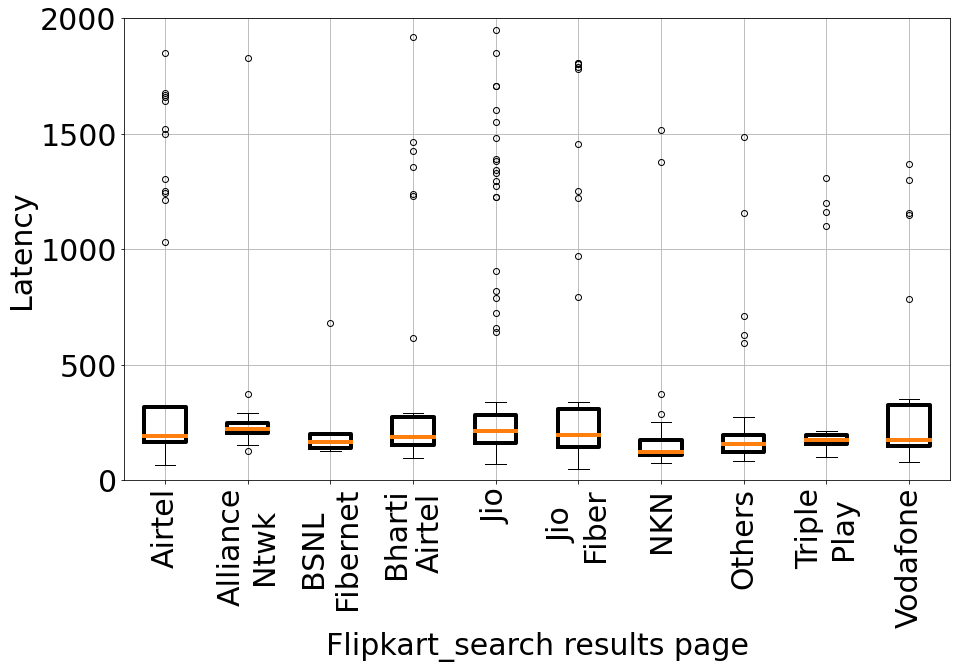

In [ ]:
rowvalues = df[df['FEATURE'] == 'Flipkart_search results page'].index.values
print(rowvalues)
filtered_data = [0] * 10
xlabels = [0] * 10
count = 0
for rownum in rowvalues:
    values = df.iloc[rownum, 2:].values
    values = values[values != 0]
    print("Median Value: ", np.median(values))
    filtered_data[count] = values
    xlabels[count] = df.iloc[rownum, -1]
    count += 1
xlabels=['Airtel', 'Alliance\nNtwk', 'BSNL\nFibernet', 'Bharti\nAirtel', 'Jio','Jio\nFiber','NKN','Others','Triple\nPlay','Vodafone']
plt.grid()
plt.boxplot(filtered_data, labels=xlabels, boxprops=boxprops, medianprops=medianprops)
plt.xticks(rotation=90)
plt.xlabel('Flipkart_search results page')
plt.ylabel('Latency')
plt.ylim([0, 2000])

#plt.show()
plt.savefig('/content/drive/MyDrive/SummerSem/ResponseTime_wrt_time_net/ISP_Plots/'+'Flipkart_search results page.pdf', bbox_inches='tight')


[139 140 141 142 143 144 145 146 147 148]
Median Value:  3021.0
Median Value:  3606.0
Median Value:  2946.5
Median Value:  2936.0
Median Value:  3188.0
Median Value:  2911.0
Median Value:  2989.0
Median Value:  3233.5
Median Value:  2576.0
Median Value:  2953.0


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


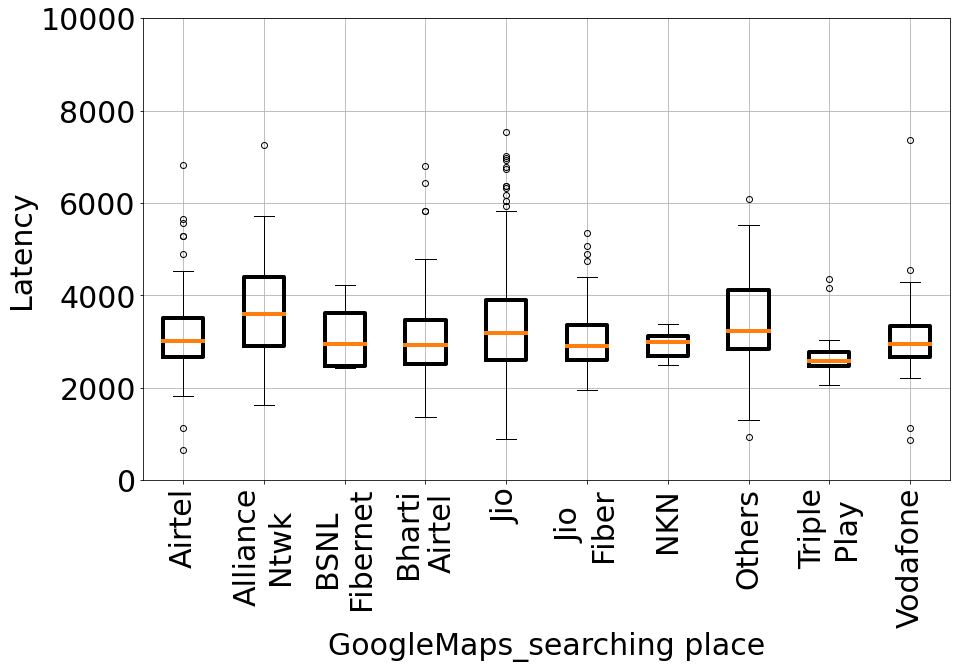

In [ ]:
rowvalues = df[df['FEATURE'] == 'GoogleMaps_searching place'].index.values
print(rowvalues)
filtered_data = [0] * 10
xlabels = [0] * 10
count = 0
for rownum in rowvalues:
    values = df.iloc[rownum, 2:].values
    values = values[values != 0]
    print("Median Value: ", np.median(values))
    filtered_data[count] = values
    xlabels[count] = df.iloc[rownum, -1]
    count += 1
xlabels=['Airtel', 'Alliance\nNtwk', 'BSNL\nFibernet', 'Bharti\nAirtel', 'Jio','Jio\nFiber','NKN','Others','Triple\nPlay','Vodafone']
plt.grid()
plt.boxplot(filtered_data, labels=xlabels, boxprops=boxprops, medianprops=medianprops)
plt.xticks(rotation=90)
plt.xlabel('GoogleMaps_searching place')
plt.ylabel('Latency')
plt.ylim([0, 10000])

#plt.show()
plt.savefig('/content/drive/MyDrive/SummerSem/ResponseTime_wrt_time_net/ISP_Plots/'+'GoogleMaps_searching place.pdf', bbox_inches='tight')


[149 150 151 152 153 154 155 156 157 158]
Median Value:  2683.0
Median Value:  2912.5
Median Value:  2654.0
Median Value:  2067.0
Median Value:  2657.5
Median Value:  2209.0
Median Value:  2329.5
Median Value:  2381.5
Median Value:  2316.5
Median Value:  2685.0


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


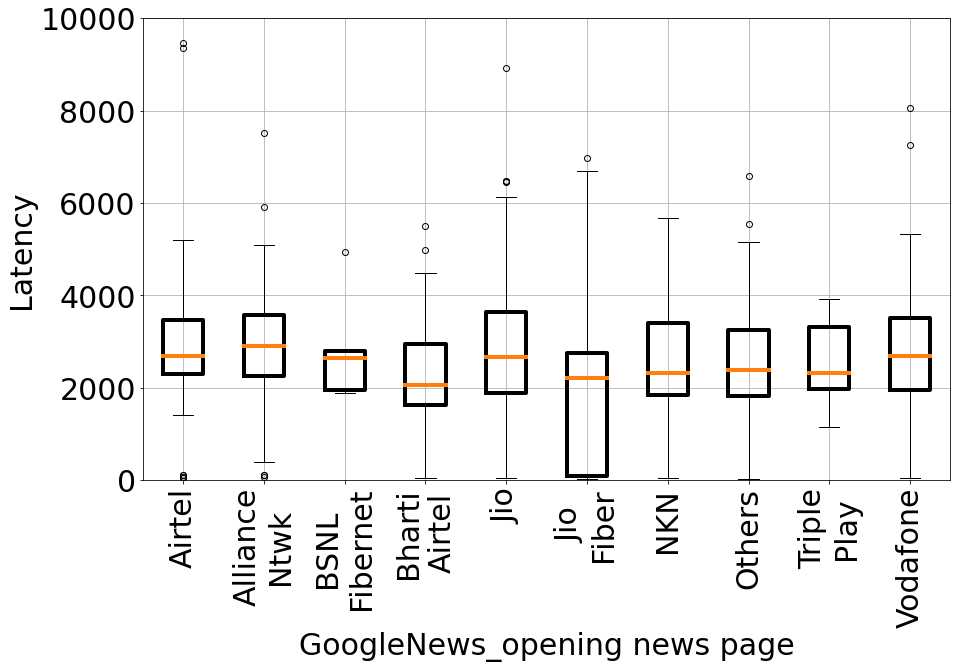

In [ ]:
rowvalues = df[df['FEATURE'] == 'GoogleNews_opening news page'].index.values
print(rowvalues)
filtered_data = [0] * 10
xlabels = [0] * 10
count = 0
for rownum in rowvalues:
    values = df.iloc[rownum, 2:].values
    values = values[values != 0]
    print("Median Value: ", np.median(values))
    filtered_data[count] = values
    xlabels[count] = df.iloc[rownum, -1]
    count += 1
xlabels=['Airtel', 'Alliance\nNtwk', 'BSNL\nFibernet', 'Bharti\nAirtel', 'Jio','Jio\nFiber','NKN','Others','Triple\nPlay','Vodafone']
plt.grid()
plt.boxplot(filtered_data, labels=xlabels, boxprops=boxprops, medianprops=medianprops)
plt.xticks(rotation=90)
plt.xlabel('GoogleNews_opening news page')
plt.ylabel('Latency')
plt.ylim([0, 10000])

#plt.show()
plt.savefig('/content/drive/MyDrive/SummerSem/ResponseTime_wrt_time_net/ISP_Plots/'+'GoogleNews_opening news page.pdf', bbox_inches='tight')


[159 160 161 162 163 164 165 166 167 168]
Median Value:  3384.0
Median Value:  2840.5
Median Value:  3211.5
Median Value:  3318.5
Median Value:  3000.0
Median Value:  3483.0
Median Value:  2069.0
Median Value:  2617.0
Median Value:  2460.0
Median Value:  3047.5


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


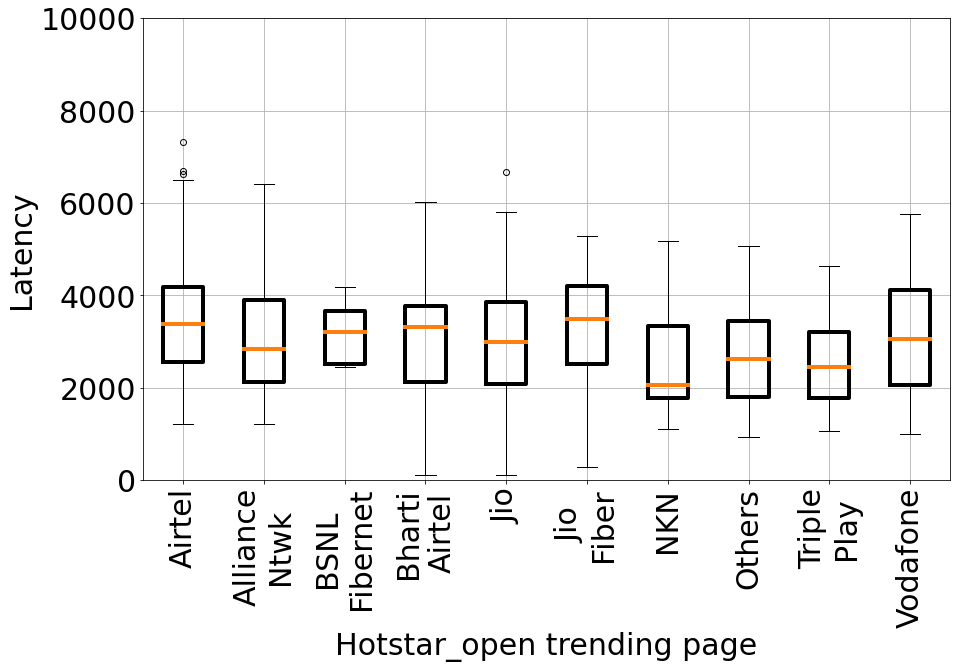

In [ ]:
rowvalues = df[df['FEATURE'] == 'Hotstar_open trending page'].index.values
print(rowvalues)
filtered_data = [0] * 10
xlabels = [0] * 10
count = 0
for rownum in rowvalues:
    values = df.iloc[rownum, 2:].values
    values = values[values != 0]
    print("Median Value: ", np.median(values))
    filtered_data[count] = values
    xlabels[count] = df.iloc[rownum, -1]
    count += 1
xlabels=['Airtel', 'Alliance\nNtwk', 'BSNL\nFibernet', 'Bharti\nAirtel', 'Jio','Jio\nFiber','NKN','Others','Triple\nPlay','Vodafone']
plt.grid()
plt.boxplot(filtered_data, labels=xlabels, boxprops=boxprops, medianprops=medianprops)
plt.xticks(rotation=90)
plt.xlabel('Hotstar_open trending page')
plt.ylabel('Latency')
plt.ylim([0, 10000])

#plt.show()
plt.savefig('/content/drive/MyDrive/SummerSem/ResponseTime_wrt_time_net/ISP_Plots/'+'Hotstar_open trending page.pdf', bbox_inches='tight')


[169 170 171 172 173 174 175 176 177 178]
Median Value:  571.0
Median Value:  590.0
Median Value:  53.0
Median Value:  186.0
Median Value:  542.5
Median Value:  178.0
Median Value:  96.0
Median Value:  428.5
Median Value:  824.0
Median Value:  803.0


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


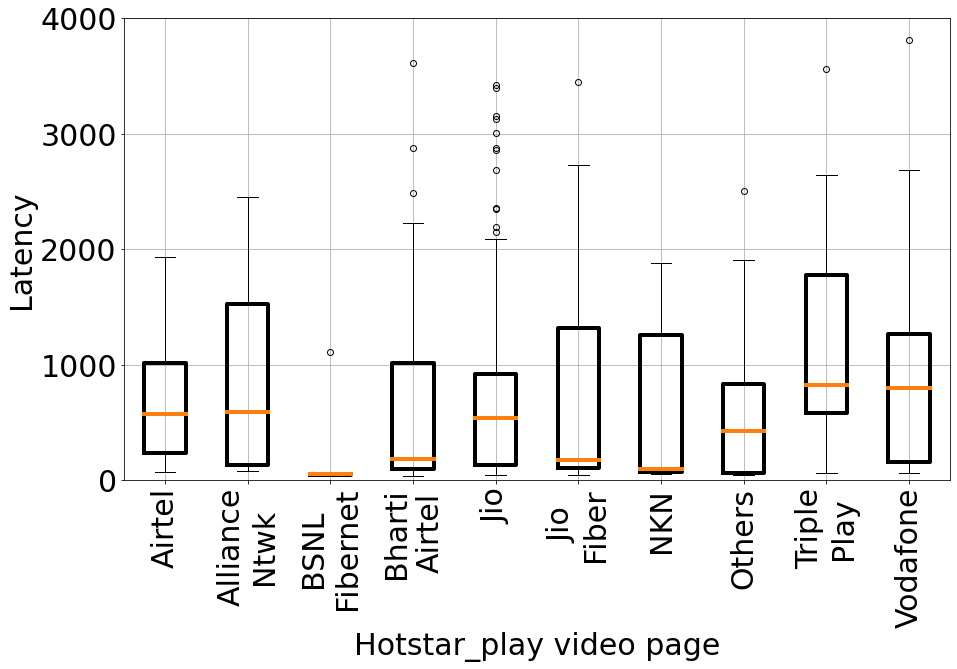

In [ ]:
rowvalues = df[df['FEATURE'] == 'Hotstar_play video page'].index.values
print(rowvalues)
filtered_data = [0] * 10
xlabels = [0] * 10
count = 0
for rownum in rowvalues:
    values = df.iloc[rownum, 2:].values
    values = values[values != 0]
    print("Median Value: ", np.median(values))
    filtered_data[count] = values
    xlabels[count] = df.iloc[rownum, -1]
    count += 1
xlabels=['Airtel', 'Alliance\nNtwk', 'BSNL\nFibernet', 'Bharti\nAirtel', 'Jio','Jio\nFiber','NKN','Others','Triple\nPlay','Vodafone']
plt.grid()
plt.boxplot(filtered_data, labels=xlabels, boxprops=boxprops, medianprops=medianprops)
plt.xticks(rotation=90)
plt.xlabel('Hotstar_play video page')
plt.ylabel('Latency')
plt.ylim([0, 4000])

#plt.show()
plt.savefig('/content/drive/MyDrive/SummerSem/ResponseTime_wrt_time_net/ISP_Plots/'+'Hotstar_play video page.pdf', bbox_inches='tight')


[179 180 181 182 183 184 185 186 187 188]
Median Value:  1156.0
Median Value:  1114.0
Median Value:  1091.0
Median Value:  1117.0
Median Value:  1137.0
Median Value:  1113.5
Median Value:  1216.5
Median Value:  1252.0
Median Value:  1094.5
Median Value:  1125.0


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


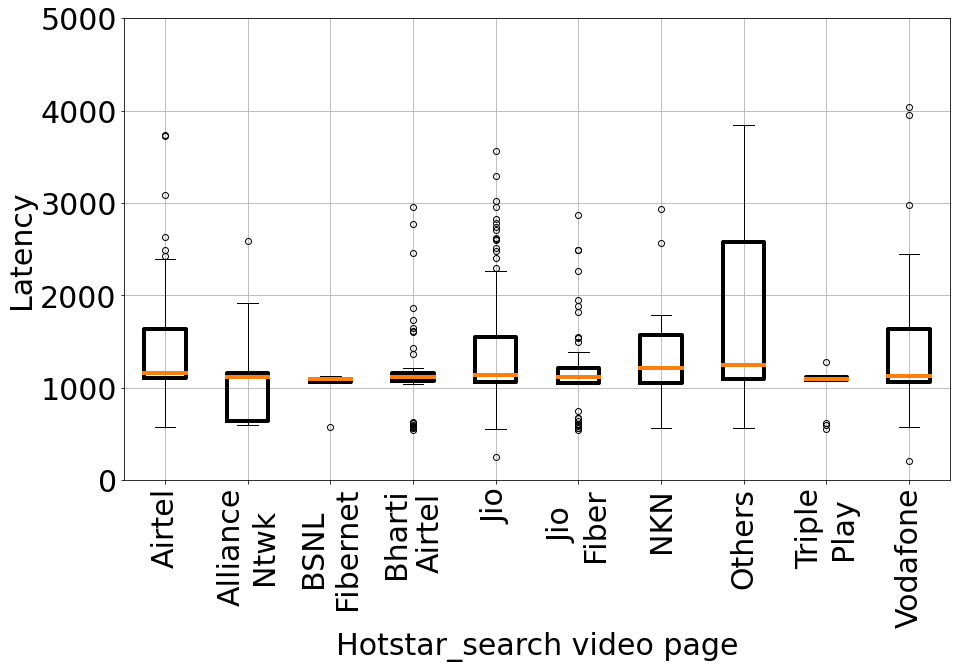

In [ ]:
rowvalues = df[df['FEATURE'] == 'Hotstar_search video page'].index.values
print(rowvalues)
filtered_data = [0] * 10
xlabels = [0] * 10
count = 0
for rownum in rowvalues:
    values = df.iloc[rownum, 2:].values
    values = values[values != 0]
    print("Median Value: ", np.median(values))
    filtered_data[count] = values
    xlabels[count] = df.iloc[rownum, -1]
    count += 1
xlabels=['Airtel', 'Alliance\nNtwk', 'BSNL\nFibernet', 'Bharti\nAirtel', 'Jio','Jio\nFiber','NKN','Others','Triple\nPlay','Vodafone']
plt.grid()
plt.boxplot(filtered_data, labels=xlabels, boxprops=boxprops, medianprops=medianprops)
plt.xticks(rotation=90)
plt.xlabel('Hotstar_search video page')
plt.ylabel('Latency')
plt.ylim([0, 5000])

#plt.show()
plt.savefig('/content/drive/MyDrive/SummerSem/ResponseTime_wrt_time_net/ISP_Plots/'+'Hotstar_search video page.pdf', bbox_inches='tight')


[189 190 191 192 193 194 195 196 197 198]
Median Value:  1440.5
Median Value:  1397.0
Median Value:  1453.0
Median Value:  1372.0
Median Value:  1317.0
Median Value:  1417.0
Median Value:  1404.5
Median Value:  1446.5
Median Value:  1370.5
Median Value:  1361.5


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


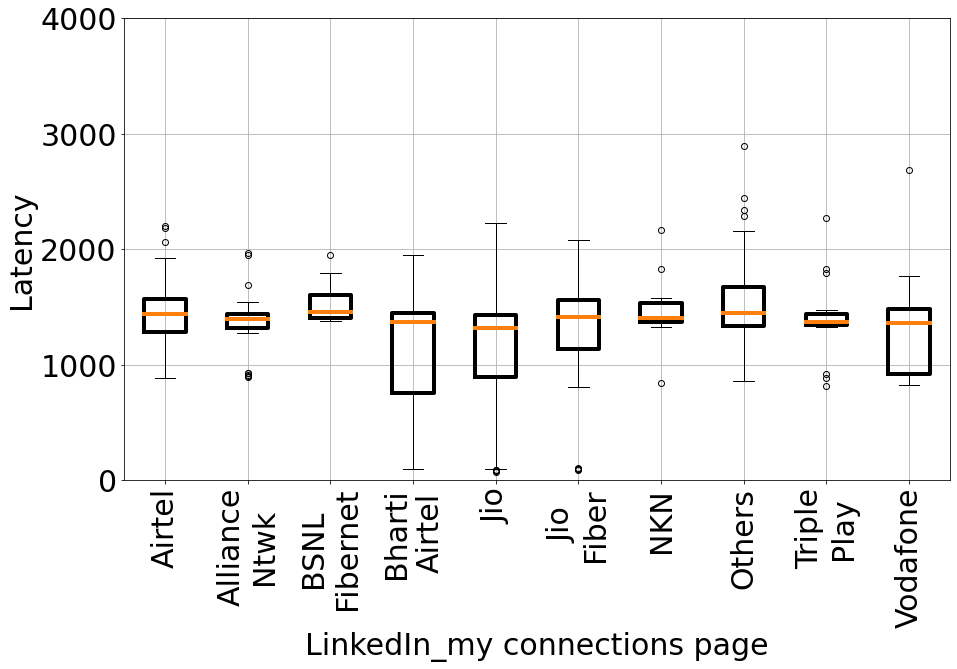

In [ ]:
rowvalues = df[df['FEATURE'] == 'LinkedIn_my connections page'].index.values
print(rowvalues)
filtered_data = [0] * 10
xlabels = [0] * 10
count = 0
for rownum in rowvalues:
    values = df.iloc[rownum, 2:].values
    values = values[values != 0]
    print("Median Value: ", np.median(values))
    filtered_data[count] = values
    xlabels[count] = df.iloc[rownum, -1]
    count += 1
xlabels=['Airtel', 'Alliance\nNtwk', 'BSNL\nFibernet', 'Bharti\nAirtel', 'Jio','Jio\nFiber','NKN','Others','Triple\nPlay','Vodafone']
plt.grid()
plt.boxplot(filtered_data, labels=xlabels, boxprops=boxprops, medianprops=medianprops)
plt.xticks(rotation=90)
plt.xlabel('LinkedIn_my connections page')
plt.ylabel('Latency')
plt.ylim([0, 4000])

#plt.show()
plt.savefig('/content/drive/MyDrive/SummerSem/ResponseTime_wrt_time_net/ISP_Plots/'+'LinkedIn_my connections page.pdf', bbox_inches='tight')


[199 200 201 202 203 204 205 206 207 208]
Median Value:  141.5
Median Value:  109.5
Median Value:  107.0
Median Value:  735.0
Median Value:  586.5
Median Value:  115.0
Median Value:  85.0
Median Value:  145.0
Median Value:  92.0
Median Value:  778.0


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


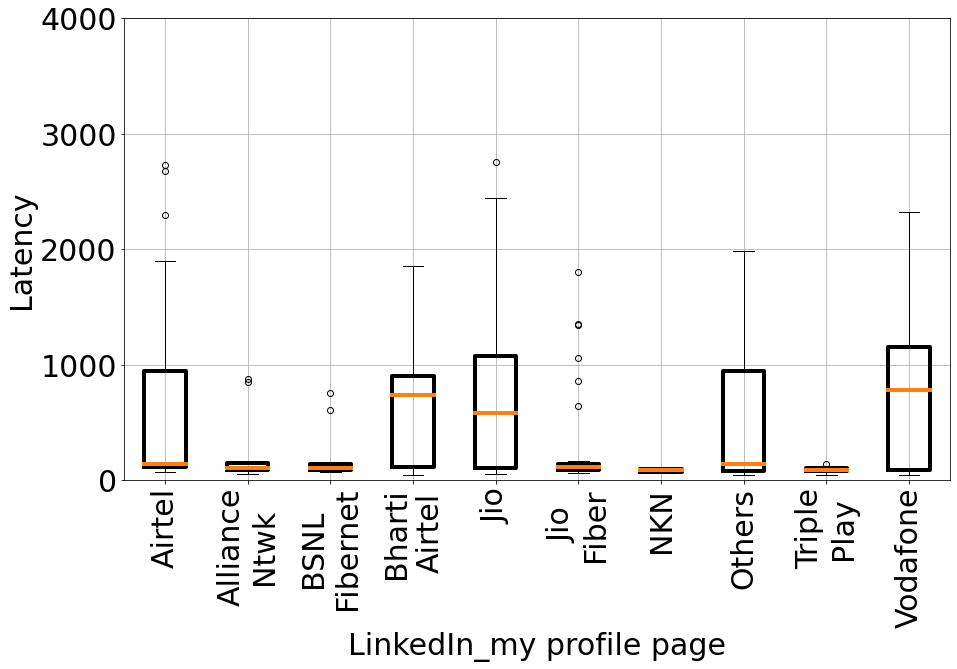

In [ ]:
rowvalues = df[df['FEATURE'] == 'LinkedIn_my profile page'].index.values
print(rowvalues)
filtered_data = [0] * 10
xlabels = [0] * 10
count = 0
for rownum in rowvalues:
    values = df.iloc[rownum, 2:].values
    values = values[values != 0]
    print("Median Value: ", np.median(values))
    filtered_data[count] = values
    xlabels[count] = df.iloc[rownum, -1]
    count += 1
xlabels=['Airtel', 'Alliance\nNtwk', 'BSNL\nFibernet', 'Bharti\nAirtel', 'Jio','Jio\nFiber','NKN','Others','Triple\nPlay','Vodafone']
plt.grid()
plt.boxplot(filtered_data, labels=xlabels, boxprops=boxprops, medianprops=medianprops)
plt.xticks(rotation=90)
plt.xlabel('LinkedIn_my profile page')
plt.ylabel('Latency')
plt.ylim([0, 4000])

#plt.show()
plt.savefig('/content/drive/MyDrive/SummerSem/ResponseTime_wrt_time_net/ISP_Plots/'+'LinkedIn_my profile page.pdf', bbox_inches='tight')


[209 210 211 212 213 214 215 216 217 218]
Median Value:  147.0
Median Value:  127.0
Median Value:  127.0
Median Value:  626.0
Median Value:  628.0
Median Value:  126.0
Median Value:  87.0
Median Value:  559.5
Median Value:  116.0
Median Value:  643.0


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


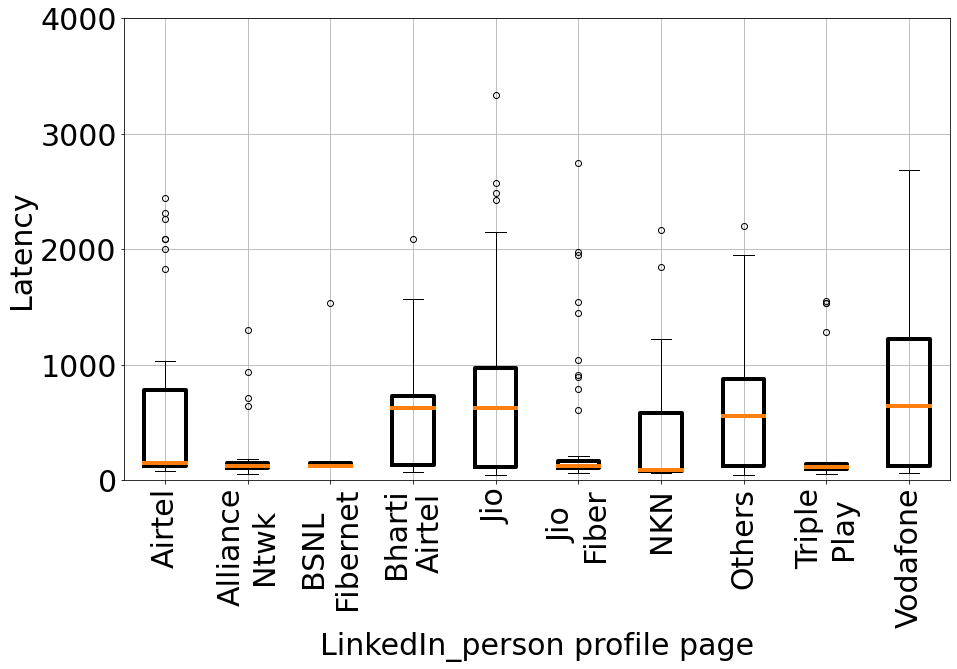

In [ ]:
rowvalues = df[df['FEATURE'] == 'LinkedIn_person profile page'].index.values
print(rowvalues)
filtered_data = [0] * 10
xlabels = [0] * 10
count = 0
for rownum in rowvalues:
    values = df.iloc[rownum, 2:].values
    values = values[values != 0]
    print("Median Value: ", np.median(values))
    filtered_data[count] = values
    xlabels[count] = df.iloc[rownum, -1]
    count += 1
xlabels=['Airtel', 'Alliance\nNtwk', 'BSNL\nFibernet', 'Bharti\nAirtel', 'Jio','Jio\nFiber','NKN','Others','Triple\nPlay','Vodafone']
plt.grid()
plt.boxplot(filtered_data, labels=xlabels, boxprops=boxprops, medianprops=medianprops)
plt.xticks(rotation=90)
plt.xlabel('LinkedIn_person profile page')
plt.ylabel('Latency')
plt.ylim([0, 4000])

#plt.show()
plt.savefig('/content/drive/MyDrive/SummerSem/ResponseTime_wrt_time_net/ISP_Plots/'+'LinkedIn_person profile page.pdf', bbox_inches='tight')


[219 220 221 222 223 224 225 226 227 228]
Median Value:  1744.0
Median Value:  2076.0
Median Value:  2297.0
Median Value:  1862.0
Median Value:  1929.0
Median Value:  1846.5
Median Value:  1594.0
Median Value:  1846.5
Median Value:  2404.0
Median Value:  1564.0


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


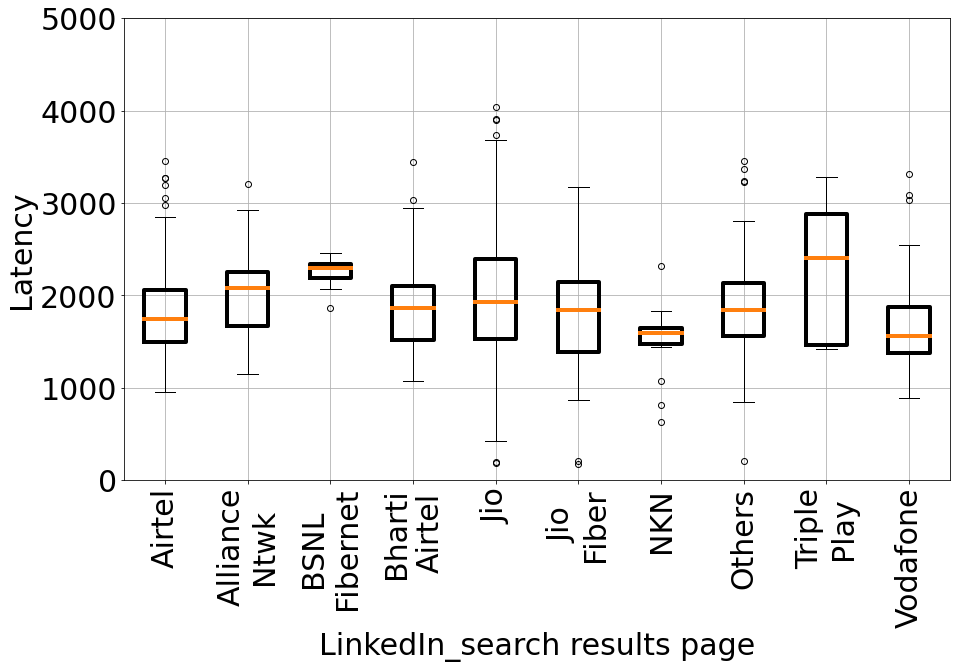

In [ ]:
rowvalues = df[df['FEATURE'] == 'LinkedIn_search results page'].index.values
print(rowvalues)
filtered_data = [0] * 10
xlabels = [0] * 10
count = 0
for rownum in rowvalues:
    values = df.iloc[rownum, 2:].values
    values = values[values != 0]
    print("Median Value: ", np.median(values))
    filtered_data[count] = values
    xlabels[count] = df.iloc[rownum, -1]
    count += 1
xlabels=['Airtel', 'Alliance\nNtwk', 'BSNL\nFibernet', 'Bharti\nAirtel', 'Jio','Jio\nFiber','NKN','Others','Triple\nPlay','Vodafone']
plt.grid()
plt.boxplot(filtered_data, labels=xlabels, boxprops=boxprops, medianprops=medianprops)
plt.xticks(rotation=90)
plt.xlabel('LinkedIn_search results page')
plt.ylabel('Latency')
plt.ylim([0, 5000])

#plt.show()
plt.savefig('/content/drive/MyDrive/SummerSem/ResponseTime_wrt_time_net/ISP_Plots/'+'LinkedIn_search results page.pdf', bbox_inches='tight')


[232 233 234 235 236 237 238 239 240 241]
Median Value:  713.5
Median Value:  1135.0
Median Value:  127.0
Median Value:  153.0
Median Value:  712.0
Median Value:  704.0
Median Value:  96.0
Median Value:  663.0
Median Value:  665.5
Median Value:  268.5


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


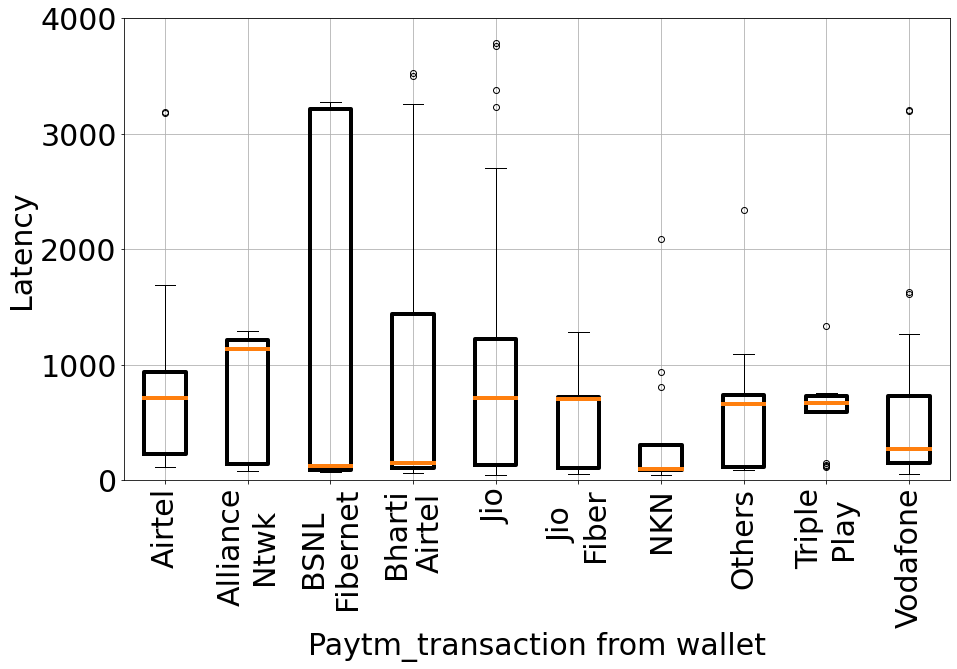

In [ ]:
rowvalues = df[df['FEATURE'] == 'Paytm_transaction from wallet'].index.values
print(rowvalues)
filtered_data = [0] * 10
xlabels = [0] * 10
count = 0
for rownum in rowvalues:
    values = df.iloc[rownum, 2:].values
    values = values[values != 0]
    print("Median Value: ", np.median(values))
    filtered_data[count] = values
    xlabels[count] = df.iloc[rownum, -1]
    count += 1
xlabels=['Airtel', 'Alliance\nNtwk', 'BSNL\nFibernet', 'Bharti\nAirtel', 'Jio','Jio\nFiber','NKN','Others','Triple\nPlay','Vodafone']
plt.grid()
plt.boxplot(filtered_data, labels=xlabels, boxprops=boxprops, medianprops=medianprops)
plt.xticks(rotation=90)
plt.xlabel('Paytm_transaction from wallet')
plt.ylabel('Latency')
plt.ylim([0, 4000])

#plt.show()
plt.savefig('/content/drive/MyDrive/SummerSem/ResponseTime_wrt_time_net/ISP_Plots/'+'Paytm_transaction from wallet.pdf', bbox_inches='tight')


[242 243 244 245 246 247 248 249 250 251]
Median Value:  219.0
Median Value:  246.0
Median Value:  198.0
Median Value:  230.5
Median Value:  232.0
Median Value:  192.0
Median Value:  140.0
Median Value:  182.0
Median Value:  179.0
Median Value:  203.0


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


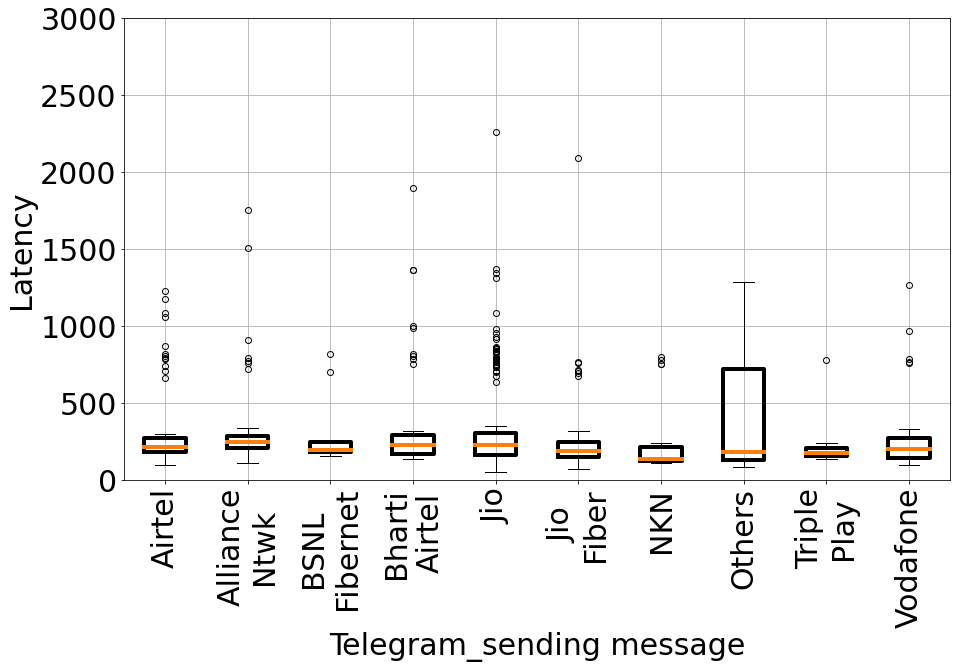

In [ ]:
rowvalues = df[df['FEATURE'] == 'Telegram_sending message'].index.values
print(rowvalues)
filtered_data = [0] * 10
xlabels = [0] * 10
count = 0
for rownum in rowvalues:
    values = df.iloc[rownum, 2:].values
    values = values[values != 0]
    print("Median Value: ", np.median(values))
    filtered_data[count] = values
    xlabels[count] = df.iloc[rownum, -1]
    count += 1
xlabels=['Airtel', 'Alliance\nNtwk', 'BSNL\nFibernet', 'Bharti\nAirtel', 'Jio','Jio\nFiber','NKN','Others','Triple\nPlay','Vodafone']
plt.grid()
plt.boxplot(filtered_data, labels=xlabels, boxprops=boxprops, medianprops=medianprops)
plt.xticks(rotation=90)
plt.xlabel('Telegram_sending message')
plt.ylabel('Latency')
plt.ylim([0, 3000])

#plt.show()
plt.savefig('/content/drive/MyDrive/SummerSem/ResponseTime_wrt_time_net/ISP_Plots/'+'Telegram_sending message.pdf', bbox_inches='tight')


[252 253 254 255 256 257 258 259 260 261]
Median Value:  1529.5
Median Value:  1692.0
Median Value:  1163.0
Median Value:  1479.5
Median Value:  1455.0
Median Value:  1417.0
Median Value:  1304.0
Median Value:  1429.5
Median Value:  1267.0
Median Value:  1432.0


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


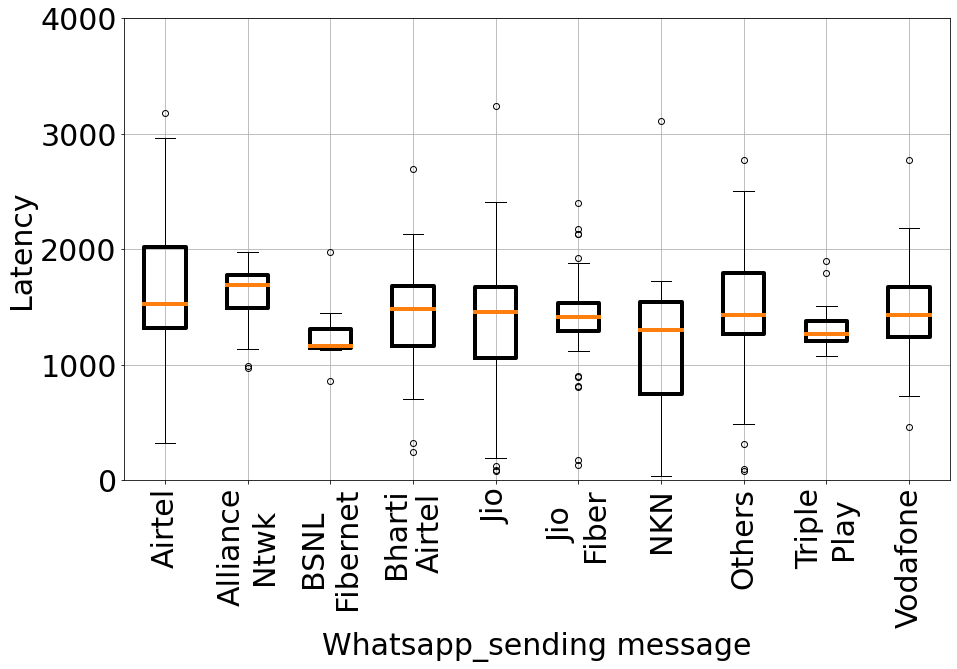

In [ ]:
rowvalues = df[df['FEATURE'] == 'Whatsapp_sending message'].index.values
print(rowvalues)
filtered_data = [0] * 10
xlabels = [0] * 10
count = 0
for rownum in rowvalues:
    values = df.iloc[rownum, 2:].values
    values = values[values != 0]
    print("Median Value: ", np.median(values))
    filtered_data[count] = values
    xlabels[count] = df.iloc[rownum, -1]
    count += 1
xlabels=['Airtel', 'Alliance\nNtwk', 'BSNL\nFibernet', 'Bharti\nAirtel', 'Jio','Jio\nFiber','NKN','Others','Triple\nPlay','Vodafone']
plt.grid()
plt.boxplot(filtered_data, labels=xlabels, boxprops=boxprops, medianprops=medianprops)
plt.xticks(rotation=90)
plt.xlabel('Whatsapp_sending message')
plt.ylabel('Latency')
plt.ylim([0, 4000])

#plt.show()
plt.savefig('/content/drive/MyDrive/SummerSem/ResponseTime_wrt_time_net/ISP_Plots/'+'Whatsapp_sending message.pdf', bbox_inches='tight')


[262 263 264 265 266 267 268 269 270 271]
Median Value:  1882.0
Median Value:  1903.0
Median Value:  1862.0
Median Value:  1807.0
Median Value:  1951.0
Median Value:  1765.5
Median Value:  1677.0
Median Value:  1793.0
Median Value:  1734.0
Median Value:  1824.0


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


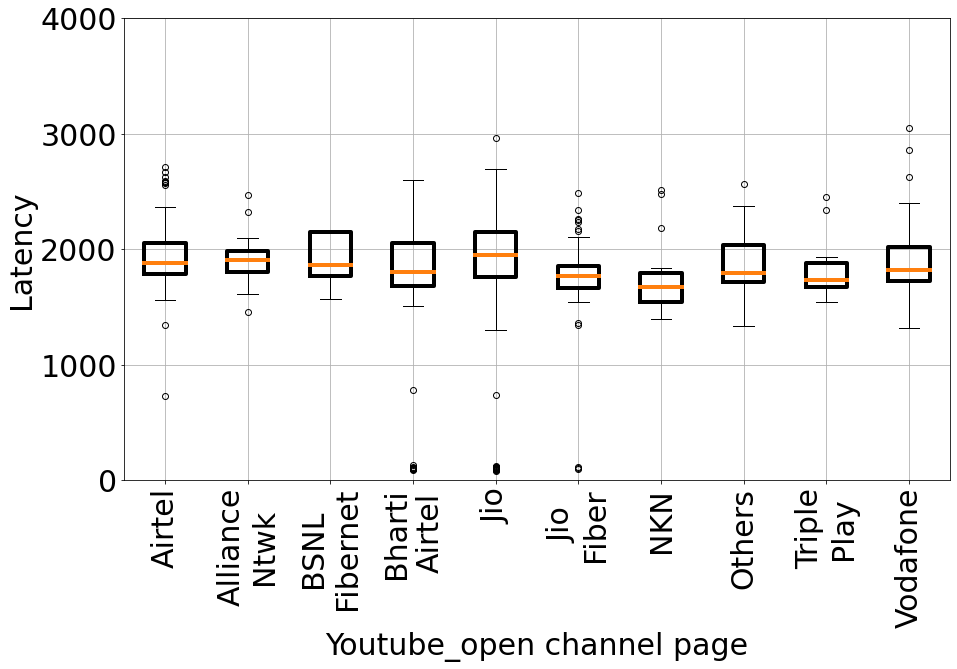

In [ ]:
rowvalues = df[df['FEATURE'] == 'Youtube_open channel page'].index.values
print(rowvalues)
filtered_data = [0] * 10
xlabels = [0] * 10
count = 0
for rownum in rowvalues:
    values = df.iloc[rownum, 2:].values
    values = values[values != 0]
    print("Median Value: ", np.median(values))
    filtered_data[count] = values
    xlabels[count] = df.iloc[rownum, -1]
    count += 1
xlabels=['Airtel', 'Alliance\nNtwk', 'BSNL\nFibernet', 'Bharti\nAirtel', 'Jio','Jio\nFiber','NKN','Others','Triple\nPlay','Vodafone']
plt.grid()
plt.boxplot(filtered_data, labels=xlabels, boxprops=boxprops, medianprops=medianprops)
plt.xticks(rotation=90)
plt.xlabel('Youtube_open channel page')
plt.ylabel('Latency')
plt.ylim([0, 4000])

#plt.show()
plt.savefig('/content/drive/MyDrive/SummerSem/ResponseTime_wrt_time_net/ISP_Plots/'+'Youtube_open channel page.pdf', bbox_inches='tight')


[272 273 274 275 276 277 278 279 280 281]
Median Value:  2973.0
Median Value:  2547.5
Median Value:  2156.0
Median Value:  2497.5
Median Value:  2562.5
Median Value:  2784.0
Median Value:  2780.0
Median Value:  2579.0
Median Value:  2790.5
Median Value:  2717.5


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


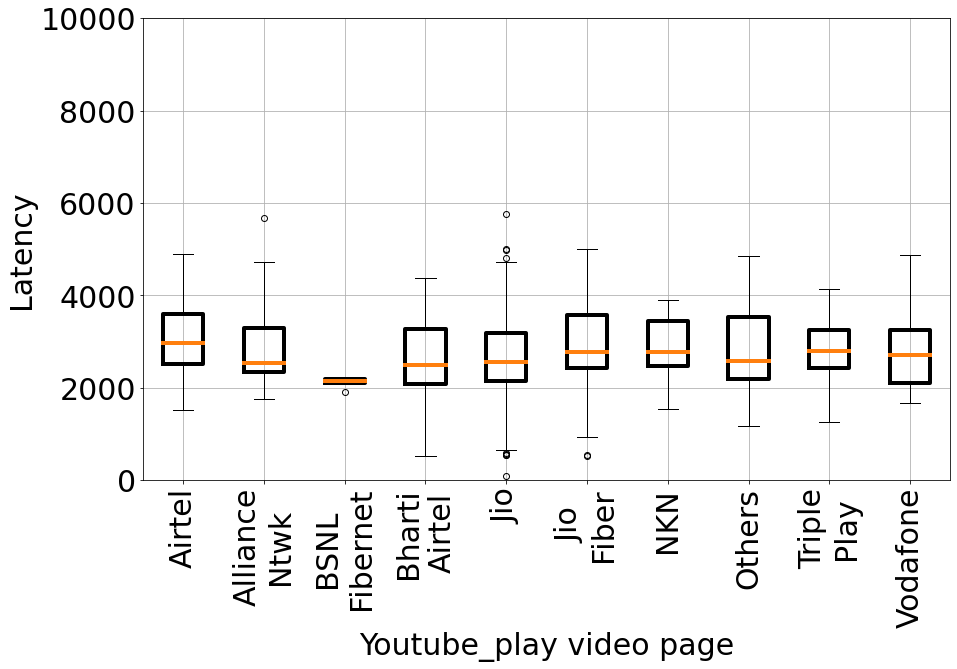

In [ ]:
rowvalues = df[df['FEATURE'] == 'Youtube_play video page'].index.values
print(rowvalues)
filtered_data = [0] * 10
xlabels = [0] * 10
count = 0
for rownum in rowvalues:
    values = df.iloc[rownum, 2:].values
    values = values[values != 0]
    print("Median Value: ", np.median(values))
    filtered_data[count] = values
    xlabels[count] = df.iloc[rownum, -1]
    count += 1
xlabels=['Airtel', 'Alliance\nNtwk', 'BSNL\nFibernet', 'Bharti\nAirtel', 'Jio','Jio\nFiber','NKN','Others','Triple\nPlay','Vodafone']
plt.grid()
plt.boxplot(filtered_data, labels=xlabels, boxprops=boxprops, medianprops=medianprops)
plt.xticks(rotation=90)
plt.xlabel('Youtube_play video page')
plt.ylabel('Latency')
plt.ylim([0, 10000])

#plt.show()
plt.savefig('/content/drive/MyDrive/SummerSem/ResponseTime_wrt_time_net/ISP_Plots/'+'Youtube_play video page.pdf', bbox_inches='tight')


[282 283 284 285 286 287 288 289 290 291]
Median Value:  1174.5
Median Value:  1211.0
Median Value:  1448.0
Median Value:  1086.5
Median Value:  1203.0
Median Value:  1166.0
Median Value:  995.0
Median Value:  1071.0
Median Value:  931.0
Median Value:  1052.5


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


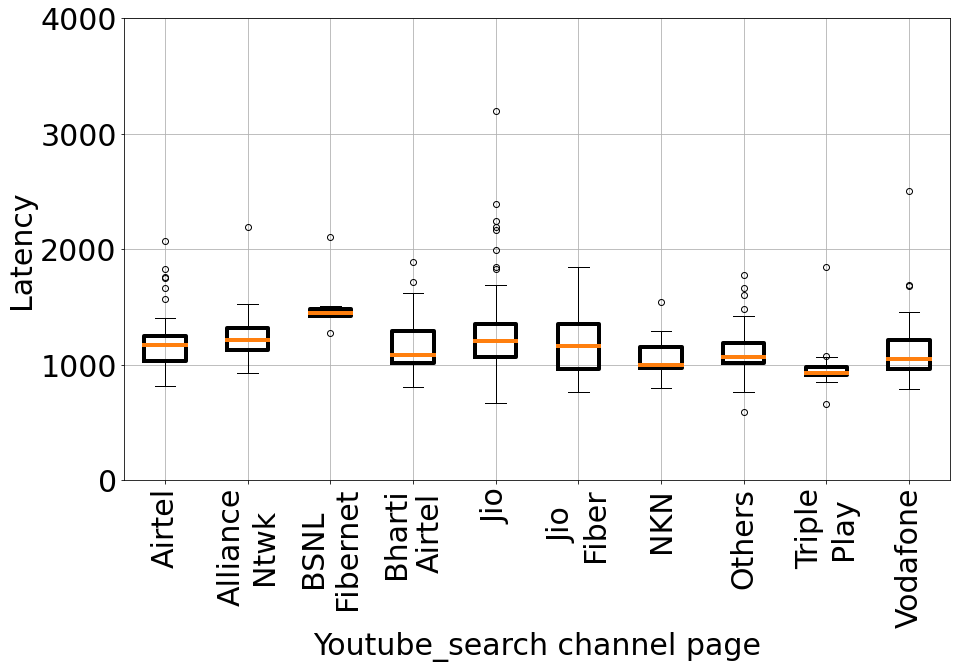

In [ ]:
rowvalues = df[df['FEATURE'] == 'Youtube_search channel page'].index.values
print(rowvalues)
filtered_data = [0] * 10
xlabels = [0] * 10
count = 0
for rownum in rowvalues:
    values = df.iloc[rownum, 2:].values
    values = values[values != 0]
    print("Median Value: ", np.median(values))
    filtered_data[count] = values
    xlabels[count] = df.iloc[rownum, -1]
    count += 1
xlabels=['Airtel', 'Alliance\nNtwk', 'BSNL\nFibernet', 'Bharti\nAirtel', 'Jio','Jio\nFiber','NKN','Others','Triple\nPlay','Vodafone']
plt.grid()
plt.boxplot(filtered_data, labels=xlabels, boxprops=boxprops, medianprops=medianprops)
plt.xticks(rotation=90)
plt.xlabel('Youtube_search channel page')
plt.ylabel('Latency')
plt.ylim([0, 4000])

#plt.show()
plt.savefig('/content/drive/MyDrive/SummerSem/ResponseTime_wrt_time_net/ISP_Plots/'+'Youtube_search channel page.pdf', bbox_inches='tight')


[292 293 294 295 296 297 298 299 300 301]
Median Value:  1216.0
Median Value:  1236.0
Median Value:  1428.0
Median Value:  1112.5
Median Value:  1239.5
Median Value:  1271.0
Median Value:  1065.5
Median Value:  1205.0
Median Value:  1055.0
Median Value:  1055.0


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


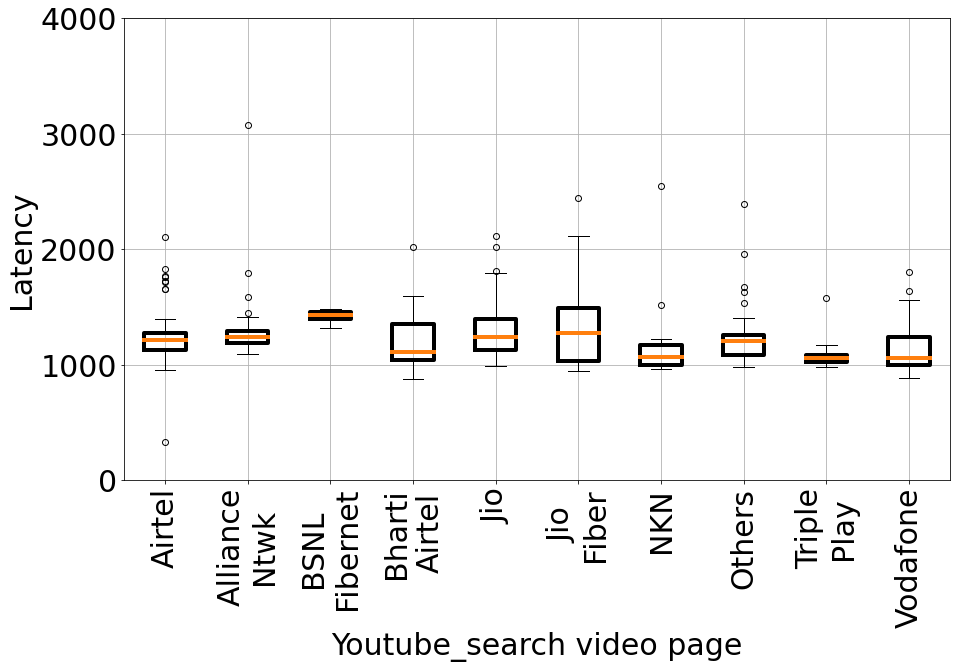

In [ ]:
rowvalues = df[df['FEATURE'] == 'Youtube_search video page'].index.values
print(rowvalues)
filtered_data = [0] * 10
xlabels = [0] * 10
count = 0
for rownum in rowvalues:
    values = df.iloc[rownum, 2:].values
    values = values[values != 0]
    print("Median Value: ", np.median(values))
    filtered_data[count] = values
    xlabels[count] = df.iloc[rownum, -1]
    count += 1
xlabels=['Airtel', 'Alliance\nNtwk', 'BSNL\nFibernet', 'Bharti\nAirtel', 'Jio','Jio\nFiber','NKN','Others','Triple\nPlay','Vodafone']
plt.grid()
plt.boxplot(filtered_data, labels=xlabels, boxprops=boxprops, medianprops=medianprops)
plt.xticks(rotation=90)
plt.xlabel('Youtube_search video page')
plt.ylabel('Latency')
plt.ylim([0, 4000])

#plt.show()
plt.savefig('/content/drive/MyDrive/SummerSem/ResponseTime_wrt_time_net/ISP_Plots/'+'Youtube_search video page.pdf', bbox_inches='tight')
